## 1. 데이터 다운로드 (ECOS API)
* ECOS 인증키
* 4WF1LN2R8CMHK5PNBM72

### 필요 데이터

* 1) 자산가격(Y) : 주택매매가격(아파트, 연립, 단독)
* 2) 통화량(X): M1(본원통화), M2, M3(Lf 중 예금취급기관)
* 3) 통제변수(X): 가계신용/통화량 (분모 뭐로 넣을지 고민), 

* 생각)
    * 가계신용: 통화량에 의해 결정되기 때문에 통화량 중 가계신용으로 가는 비율로 활용
    * 금리: 통화량의 영향을 받기 때문에 고려 X -> 인과성 문제
    * GDP: 생산량 증대에 의한 자산가격 변화 통제  
       * quarterly 데이터를 monthly로 interpolation !
    * 시점더미 넣자(분기별) --> 시점별 고정효과

In [1]:
import datetime                     
import requests
import pandas as pd
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup


# ECOS 에서 데이터를 호출하는 함수
def EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):
    
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/4WF1LN2R8CMHK5PNBM72/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)
    
    raw = requests.get(url)
    xml = BeautifulSoup(raw.text,'xml')

    # 데이터프레임으로 전환
    raw_data = xml.find_all("row")

    
    date_list = []
    date_list2 = []
    value_list = []

    for item in raw_data:
         
            value = item.find('DATA_VALUE').text.encode('utf-8')
            date_str = item.find('TIME').text
            
            value = float(value)
            
            
            date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
            date_list2.append(date_str)
            value_list.append(value)
            
    df = pd.DataFrame(index = date_list2)
    df['date'] = date_list2 
    df['value'] = value_list
      
    return df


# 데이터 저장
# 0) CPI - 변수 실질화
CPI = EcosDownload('021Y125', 'MM', '200401', '202109', '0', '','') # 전국   # 나중에 지역별 CPI로 실질화 해도 좋을듯
 

# 1) 자산가격 (Y)
# 유형별 주택매매가격지수(아파트)
# 2003-11 ~ 2021-10
sales_APT_kr = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70A','') # 전국
sales_APT_sudo = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70B','') # 수도권
sales_APT_metro = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70D','') # 5개광역시
sales_APT_etc = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70E','') # 기타지방
sales_APT_SE = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70F','') # 서울
sales_APT_GG = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70G','') # 경기
sales_APT_IC = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70H','') # 인천
sales_APT_BU = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70I','') # 부산
sales_APT_DG = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70J','') # 대구
sales_APT_GJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70K','') # 광주
sales_APT_DJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70L','') # 대전
sales_APT_US = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70M','') # 울산
sales_APT_SJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70N','') # 세종
sales_APT_GW = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70O','') # 강원
sales_APT_CB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70P','') # 충북
sales_APT_CN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70Q','') # 충남
sales_APT_JB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70R','') # 전북
sales_APT_JN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70S','') # 전남
sales_APT_KB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70T','') # 경북
sales_APT_KN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70U','') # 경남
sales_APT_JJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69B', 'R70V','') # 제주

# 유형별 주택매매가격지수(연립다세대)
# 2003-11 ~ 2021-10
sales_DSD_kr = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70A','') # 전국
sales_DSD_sudo = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70B','') # 수도권
sales_DSD_metro = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70D','') # 기타지방
sales_DSD_etc = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70E','') # 기타지방
sales_DSD_SE = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70F','') # 서울
sales_DSD_GG = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70G','') # 경기
sales_DSD_IC = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70H','') # 인천
sales_DSD_BU = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70I','') # 부산
sales_DSD_DG = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70J','') # 대구
sales_DSD_GJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70K','') # 광주
sales_DSD_DJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70L','') # 대전
sales_DSD_US = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70M','') # 울산
sales_DSD_SJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70N','') # 세종
sales_DSD_GW = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70O','') # 강원
sales_DSD_CB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70P','') # 충북
sales_DSD_CN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70Q','') # 충남
sales_DSD_JB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70R','') # 전북
sales_DSD_JN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70S','') # 전남
sales_DSD_KB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70T','') # 경북
sales_DSD_KN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70U','') # 경남
sales_DSD_JJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69C', 'R70V','') # 제주

# 유형별 주택매매가격지수(단독)
# 2003-11 ~ 2021-10
sales_DD_kr = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70A','') # 전국
sales_DD_sudo = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70B','') # 수도권
sales_DD_metro = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70D','') # 5개광역시
sales_DD_etc = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70E','') # 5개광역시
sales_DD_SE = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70F','') # 서울
sales_DD_GG = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70G','') # 경기
sales_DD_IC = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70H','') # 인천
sales_DD_BU = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70I','') # 부산
sales_DD_DG = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70J','') # 대구
sales_DD_GJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70K','') # 광주
sales_DD_DJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70L','') # 대전
sales_DD_US = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70M','') # 울산
sales_DD_SJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70N','') # 세종
sales_DD_GW = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70O','') # 강원
sales_DD_CB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70P','') # 충북
sales_DD_CN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70Q','') # 충남
sales_DD_JB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70R','') # 전북
sales_DD_JN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70S','') # 전남
sales_DD_KB = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70T','') # 경북
sales_DD_KN = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70U','') # 경남
sales_DD_JJ = EcosDownload('085Y069', 'MM', '200401', '202109', 'H69D', 'R70V','') # 제주


# 2) 통화량 변수
# 본원통화 (평잔, 원계열, 십억원)
df_M1 = EcosDownload('054Y008', 'MM', '200401', '202109', 'ABA1', '','')
# M2 (평잔, 원계열, 십억원)
df_M2 = EcosDownload('001Y007', 'MM', '200401', '202109', 'BBHA00', '','')
# Lf예금취급기관 (평잔, 원계열, 십억원)
df_M3 = EcosDownload('075Y002', 'MM', '200401', '202109', 'LA01000', '','')


# 3) 통제변수
# 실질GDP
# 2003-10 ~2021-09
real_GDP_Q = EcosDownload('111Y013', 'QQ', '20034', '20213', '1400', '','')

# 예금취급기관의 가계대출(십억원)
# 총통화량 중 가계신용비중으로 활용 -> '통화량의 가계유입'의 대응변수
# 2003-10 ~2021-09
df_HOUS_debt = EcosDownload('008Y002', 'MM', '200401', '202109', '1110000', '','')
# 유형별 주택전세가격지수(아파트)
js_APT_kr = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70A','') # 전국
js_APT_sudo = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70B','') # 수도권
js_APT_metro = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70D','') # 5개광역시
js_APT_etc = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70E','') # 기타지방
js_APT_SE = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70F','') # 서울
js_APT_GG = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70G','') # 경기
js_APT_IC = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70H','') # 인천
js_APT_BU = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70I','') # 부산
js_APT_DG = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70J','') # 대구
js_APT_GJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70K','') # 광주
js_APT_DJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70L','') # 대전
js_APT_US = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70M','') # 울산
js_APT_SJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70N','') # 세종
js_APT_GW = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70O','') # 강원
js_APT_CB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70P','') # 충북
js_APT_CN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70Q','') # 충남
js_APT_JB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70R','') # 전북
js_APT_JN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70S','') # 전남
js_APT_KB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70T','') # 경북
js_APT_KN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70U','') # 경남
js_APT_JJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69B', 'R70V','') # 제주

# 유형별 주택전세가격지수(연립다세대)
js_DSD_kr = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70A','') # 전국
js_DSD_sudo = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70B','') # 수도권
js_DSD_metro = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70D','') # 5개광역시
js_DSD_etc = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70E','') # 기타지방
js_DSD_SE = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70F','') # 서울
js_DSD_GG = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70G','') # 경기
js_DSD_IC = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70H','') # 인천
js_DSD_BU = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70I','') # 부산
js_DSD_DG = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70J','') # 대구
js_DSD_GJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70K','') # 광주
js_DSD_DJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70L','') # 대전
js_DSD_US = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70M','') # 울산
js_DSD_SJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70N','') # 세종
js_DSD_GW = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70O','') # 강원
js_DSD_CB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70P','') # 충북
js_DSD_CN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70Q','') # 충남
js_DSD_JB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70R','') # 전북
js_DSD_JN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70S','') # 전남
js_DSD_KB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70T','') # 경북
js_DSD_KN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70U','') # 경남
js_DSD_JJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69C', 'R70V','') # 제주

# 유형별 주택전세가격지수(단독)
js_DD_kr = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70A','') # 전국
js_DD_sudo = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70B','') # 수도권
js_DD_metro = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70D','') # 5개광역시
js_DD_etc = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70E','') # 기타지방
js_DD_SE = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70F','') # 서울
js_DD_GG = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70G','') # 경기
js_DD_IC = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70H','') # 인천
js_DD_BU = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70I','') # 부산
js_DD_DG = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70J','') # 대구
js_DD_GJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70K','') # 광주
js_DD_DJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70L','') # 대전
js_DD_US = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70M','') # 울산
js_DD_SJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70N','') # 세종
js_DD_GW = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70O','') # 강원
js_DD_CB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70P','') # 충북
js_DD_CN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70Q','') # 충남
js_DD_JB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70R','') # 전북
js_DD_JN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70S','') # 전남
js_DD_KB = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70T','') # 경북
js_DD_KN = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70U','') # 경남
js_DD_JJ = EcosDownload('085Y070', 'MM', '200401', '202109', 'H69D', 'R70V','') # 제주


In [2]:
# GDP 초기화용
# 실질GDP
# 2003-10 ~2021-09
# real_GDP_Q = EcosDownload('111Y013', 'QQ', '20034', '20213', '1400', '','')


## 2. 데이터 마트 구축

### 데이터 조작
    * 1) GDP: 분기 GDP는 선형보간으로 월별 GDP로 변경
    * 2) 시계열 변수는 loganize !, 금액 변수는 CPI로 나누어 실질화    
    * 3) 아파트매매가격지수의 최적시차(AIC 기준)를 구해 차분변수 생성

In [3]:
M=dict()

In [4]:
# 공차 컬럼 만들기
real_GDP_Q['common_diff'] = (real_GDP_Q['value'] - real_GDP_Q['value'].shift(1)) / 3

m=0
for r,c in real_GDP_Q.iterrows():
    yr = c['date'][:4]
    qtr = c['date'][-1] # 뒤에서 하나가 분기
    
    value = c['value']
    common_diff = c['common_diff']

    j = 0
    for i in range(3 * (int(qtr) - 1) + 1 , 3 * int(qtr) + 1):
        print(c['date'], '{}{}'.format(yr, str(i).zfill(2)), value, j, value - common_diff * (2 - j))
        M[m] = {'date':'{}{}'.format(yr, str(i).zfill(2)),  'value': value - common_diff * (2 - j)}
        j+= 1
        m+= 1

    

20034 200310 270800.0 0 nan
20034 200311 270800.0 1 nan
20034 200312 270800.0 2 nan
20041 200401 274198.0 0 271932.6666666667
20041 200402 274198.0 1 273065.3333333333
20041 200403 274198.0 2 274198.0
20042 200404 276291.5 0 274895.8333333333
20042 200405 276291.5 1 275593.6666666667
20042 200406 276291.5 2 276291.5
20043 200407 277412.1 0 276665.0333333333
20043 200408 277412.1 1 277038.56666666665
20043 200409 277412.1 2 277412.1
20044 200410 279514.7 0 278112.9666666667
20044 200411 279514.7 1 278813.8333333333
20044 200412 279514.7 2 279514.7
20051 200501 281893.1 0 280307.5
20051 200502 281893.1 1 281100.3
20051 200503 281893.1 2 281893.1
20052 200504 287212.6 0 283666.26666666666
20052 200505 287212.6 1 285439.4333333333
20052 200506 287212.6 2 287212.6
20053 200507 291536.1 0 288653.76666666666
20053 200508 291536.1 1 290094.9333333333
20053 200509 291536.1 2 291536.1
20054 200510 294487.8 0 292520.0
20054 200511 294487.8 1 293503.89999999997
20054 200512 294487.8 2 294487.8
200

In [5]:
M2=pd.DataFrame(M)
M3 = M2.transpose()[3:].set_index('date')
M3

,value
date,
200401,271933
200402,273065
200403,274198
200404,274896
200405,275594
...,...
202105,475030
202106,476245
202107,476739


In [6]:

## 데이터마트 완성
Mart = pd.concat([df_M1['date'],M3['value'],CPI['value'],df_M1['value'],df_M2['value'],df_M3['value'],df_HOUS_debt['value'],sales_APT_kr['value'],sales_APT_sudo['value'],sales_APT_metro['value'],sales_APT_etc['value'],sales_APT_SE['value'],sales_APT_GG['value'],sales_APT_IC['value'],sales_APT_BU['value'],sales_APT_DG['value'],sales_APT_GJ['value'],sales_APT_DJ['value'],sales_APT_US['value'],sales_APT_SJ['value'],sales_APT_GW['value'],sales_APT_CB['value'],sales_APT_CN['value'],sales_APT_JB['value'],sales_APT_JN['value'],sales_APT_KB['value'],sales_APT_KN['value'],sales_APT_JJ['value'],sales_DSD_kr['value'],sales_DSD_sudo['value'],sales_DSD_metro['value'],sales_DSD_etc['value'],sales_DSD_SE['value'],sales_DSD_GG['value'],sales_DSD_IC['value'],sales_DSD_BU['value'],sales_DSD_DG['value'],sales_DSD_GJ['value'],sales_DSD_DJ['value'],sales_DSD_US['value'],sales_DSD_SJ['value'],sales_DSD_GW['value'],sales_DSD_CB['value'],sales_DSD_CN['value'],sales_DSD_JB['value'],sales_DSD_JN['value'],sales_DSD_KB['value'],sales_DSD_KN['value'],sales_DSD_JJ['value'],sales_DD_kr['value'],sales_DD_sudo['value'],sales_DD_metro['value'],sales_DD_etc['value'],sales_DD_SE['value'],sales_DD_GG['value'],sales_DD_IC['value'],sales_DD_BU['value'],sales_DD_DG['value'],sales_DD_GJ['value'],sales_DD_DJ['value'],sales_DD_US['value'],sales_DD_SJ['value'],sales_DD_GW['value'],sales_DD_CB['value'],sales_DD_CN['value'],sales_DD_JB['value'],sales_DD_JN['value'],sales_DD_KB['value'],sales_DD_KN['value'],sales_DD_JJ['value'],js_APT_kr['value'],js_APT_sudo['value'],js_APT_metro['value'],js_APT_etc['value'],js_APT_SE['value'],js_APT_GG['value'],js_APT_IC['value'],js_APT_BU['value'],js_APT_DG['value'],js_APT_GJ['value'],js_APT_DJ['value'],js_APT_US['value'],js_APT_SJ['value'],js_APT_GW['value'],js_APT_CB['value'],js_APT_CN['value'],js_APT_JB['value'],js_APT_JN['value'],js_APT_KB['value'],js_APT_KN['value'],js_APT_JJ['value'],js_DSD_kr['value'],js_DSD_sudo['value'],js_DSD_metro['value'],js_DSD_etc['value'],js_DSD_SE['value'],js_DSD_GG['value'],js_DSD_IC['value'],js_DSD_BU['value'],js_DSD_DG['value'],js_DSD_GJ['value'],js_DSD_DJ['value'],js_DSD_US['value'],js_DSD_SJ['value'],js_DSD_GW['value'],js_DSD_CB['value'],js_DSD_CN['value'],js_DSD_JB['value'],js_DSD_JN['value'],js_DSD_KB['value'],js_DSD_KN['value'],js_DSD_JJ['value'],js_DD_kr['value'],js_DD_sudo['value'],js_DD_metro['value'],js_DD_etc['value'],js_DD_SE['value'],js_DD_GG['value'],js_DD_IC['value'],js_DD_BU['value'],js_DD_DG['value'],js_DD_GJ['value'],js_DD_DJ['value'],js_DD_US['value'],js_DD_SJ['value'],js_DD_GW['value'],js_DD_CB['value'],js_DD_CN['value'],js_DD_JB['value'],js_DD_JN['value'],js_DD_KB['value'],js_DD_KN['value'],js_DD_JJ['value']],axis=1)
Mart.columns = ['date','real_GDP_M','CPI','M1','M2','M3','HOUS_debt','sales_APT_kr','sales_APT_sudo','sales_APT_metro','sales_APT_etc','sales_APT_SE','sales_APT_GG','sales_APT_IC','sales_APT_BU','sales_APT_DG','sales_APT_GJ','sales_APT_DJ','sales_APT_US','sales_APT_SJ','sales_APT_GW','sales_APT_CB','sales_APT_CN','sales_APT_JB','sales_APT_JN','sales_APT_KB','sales_APT_KN','sales_APT_JJ','sales_DSD_kr','sales_DSD_sudo','sales_DSD_metro','sales_DSD_etc','sales_DSD_SE','sales_DSD_GG','sales_DSD_IC','sales_DSD_BU','sales_DSD_DG','sales_DSD_GJ','sales_DSD_DJ','sales_DSD_US','sales_DSD_SJ','sales_DSD_GW','sales_DSD_CB','sales_DSD_CN','sales_DSD_JB','sales_DSD_JN','sales_DSD_KB','sales_DSD_KN','sales_DSD_JJ','sales_DD_kr','sales_DD_sudo','sales_DD_metro','sales_DD_etc','sales_DD_SE','sales_DD_GG','sales_DD_IC','sales_DD_BU','sales_DD_DG','sales_DD_GJ','sales_DD_DJ','sales_DD_US','sales_DD_SJ','sales_DD_GW','sales_DD_CB','sales_DD_CN','sales_DD_JB','sales_DD_JN','sales_DD_KB','sales_DD_KN','sales_DD_JJ','js_APT_kr','js_APT_sudo','js_APT_metro','js_APT_etc','js_APT_SE','js_APT_GG','js_APT_IC','js_APT_BU','js_APT_DG','js_APT_GJ','js_APT_DJ','js_APT_US','js_APT_SJ','js_APT_GW','js_APT_CB','js_APT_CN','js_APT_JB','js_APT_JN','js_APT_KB','js_APT_KN','js_APT_JJ','js_DSD_kr','js_DSD_sudo','js_DSD_metro','js_DSD_etc','js_DSD_SE','js_DSD_GG','js_DSD_IC','js_DSD_BU','js_DSD_DG','js_DSD_GJ','js_DSD_DJ','js_DSD_US','js_DSD_SJ','js_DSD_GW','js_DSD_CB','js_DSD_CN','js_DSD_JB','js_DSD_JN','js_DSD_KB','js_DSD_KN','js_DSD_JJ','js_DD_kr','js_DD_sudo','js_DD_metro','js_DD_etc','js_DD_SE','js_DD_GG','js_DD_IC','js_DD_BU','js_DD_DG','js_DD_GJ','js_DD_DJ','js_DD_US','js_DD_SJ','js_DD_GW','js_DD_CB','js_DD_CN','js_DD_JB','js_DD_JN','js_DD_KB','js_DD_KN','js_DD_JJ']
Mart


,date,real_GDP_M,CPI,M1,M2,M3,HOUS_debt,sales_APT_kr,sales_APT_sudo,sales_APT_metro,...,js_DD_US,js_DD_SJ,js_DD_GW,js_DD_CB,js_DD_CN,js_DD_JB,js_DD_JN,js_DD_KB,js_DD_KN,js_DD_JJ
200401,200401,271933,75.027,38875.0,901048.5,1080903.5,320769.8,55.0,51.9,52.5,...,84.7,NaN,94.8,84.4,83.4,92.4,93.3,112.3,95.7,125.1
200402,200402,273065,75.359,37664.2,906803.8,1088006.8,324479.4,55.1,52.1,52.6,...,84.3,NaN,94.4,86.2,83.9,91.7,92.6,110.9,94.7,119.5
200403,200403,274198,76.091,37380.6,916675.5,1103158.3,328557.2,55.4,52.3,52.8,...,83.9,NaN,94.4,83.1,84.2,91.3,92.4,110.5,94.2,113.5
200404,200404,274896,76.091,36990.4,918329.7,1103792.2,331650.8,55.6,52.5,53.0,...,84.5,NaN,94.0,83.3,84.9,91.4,92.4,109.5,93.6,113.5
200405,200405,275594,76.025,36980.0,921252.0,1108788.0,334895.4,55.7,52.5,53.2,...,84.4,NaN,93.9,83.6,85.2,91.4,91.8,108.6,93.3,113.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202105,202105,475030,107.460,234703.4,3379753.9,4151774.2,1212641.6,98.3,97.8,98.6,...,99.9,100.0,99.9,99.9,100.0,99.9,99.9,100.0,100.0,100.0
202106,202106,476245,107.390,240426.3,3413899.8,4189354.7,1219371.2,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
202107,202107,476739,107.610,239721.2,3445243.0,4227923.2,1232276.9,101.2,101.6,100.8,...,100.3,100.1,100.1,100.2,100.0,100.0,100.1,100.0,100.0,100.1
202108,202108,477233,108.290,241833.7,3487634.1,4269653.3,1240150.7,102.6,103.5,101.8,...,100.5,100.1,100.2,100.3,100.1,100.1,100.1,100.1,100.1,100.3


In [7]:
## 변수 로그화 + 금액변수 CPI 실질화 + 파생변수 생성(GDP대비 가계부채비율)
import numpy as np

Mart_adj=[]

Mart_adj = pd.DataFrame({'date': Mart['date'],'real_GDP_M': np.log(Mart['real_GDP_M'].astype('float64')),'CPI': Mart['CPI'],'M1': np.log(Mart['M1']),'M2': np.log(Mart['M2']),'M3': np.log(Mart['M3']),'M1_L3': np.log(Mart['M1']).shift(3),'M2_L3': np.log(Mart['M2']).shift(3),'M3_L3': np.log(Mart['M3']).shift(3),'M1_L6': np.log(Mart['M1']).shift(6),'M2_L6': np.log(Mart['M2']).shift(6),'M3_L6': np.log(Mart['M3']).shift(6),'M1_L9': np.log(Mart['M1']).shift(9),'M2_L9': np.log(Mart['M2']).shift(9),'M3_L9': np.log(Mart['M3']).shift(9),'M1_L12': np.log(Mart['M1']).shift(12),'M2_L12': np.log(Mart['M2']).shift(12),'M3_L12': np.log(Mart['M3']).shift(12),'M1_L24': np.log(Mart['M1']).shift(24),'M2_L24': np.log(Mart['M2']).shift(24),'M3_L24': np.log(Mart['M3']).shift(24),'HOUS_debt': Mart['HOUS_debt']/Mart['real_GDP_M'],'sales_APT_kr': np.log(Mart['sales_APT_kr']/Mart['CPI']),'sales_APT_sudo': np.log(Mart['sales_APT_sudo']/Mart['CPI']),'sales_APT_metro': np.log(Mart['sales_APT_metro']/Mart['CPI']),'sales_APT_etc': np.log(Mart['sales_APT_etc']/Mart['CPI']),'sales_APT_SE': np.log(Mart['sales_APT_SE']/Mart['CPI']),'sales_APT_GG': np.log(Mart['sales_APT_GG']/Mart['CPI']),'sales_APT_IC': np.log(Mart['sales_APT_IC']/Mart['CPI']),'sales_APT_BU': np.log(Mart['sales_APT_BU']/Mart['CPI']),'sales_APT_DG': np.log(Mart['sales_APT_DG']/Mart['CPI']),'sales_APT_GJ': np.log(Mart['sales_APT_GJ']/Mart['CPI']),'sales_APT_DJ': np.log(Mart['sales_APT_DJ']/Mart['CPI']),'sales_APT_US': np.log(Mart['sales_APT_US']/Mart['CPI']),'sales_APT_SJ': np.log(Mart['sales_APT_SJ']/Mart['CPI']),'sales_APT_GW': np.log(Mart['sales_APT_GW']/Mart['CPI']),'sales_APT_CB': np.log(Mart['sales_APT_CB']/Mart['CPI']),'sales_APT_CN': np.log(Mart['sales_APT_CN']/Mart['CPI']),'sales_APT_JB': np.log(Mart['sales_APT_JB']/Mart['CPI']),'sales_APT_JN': np.log(Mart['sales_APT_JN']/Mart['CPI']),'sales_APT_KB': np.log(Mart['sales_APT_KB']/Mart['CPI']),'sales_APT_KN': np.log(Mart['sales_APT_KN']/Mart['CPI']),'sales_APT_JJ': np.log(Mart['sales_APT_JJ']/Mart['CPI']),'sales_DSD_kr': np.log(Mart['sales_DSD_kr']/Mart['CPI']),'sales_DSD_sudo': np.log(Mart['sales_DSD_sudo']/Mart['CPI']),'sales_DSD_metro': np.log(Mart['sales_DSD_metro']/Mart['CPI']),'sales_DSD_etc': np.log(Mart['sales_DSD_etc']/Mart['CPI']),'sales_DSD_SE': np.log(Mart['sales_DSD_SE']/Mart['CPI']),'sales_DSD_GG': np.log(Mart['sales_DSD_GG']/Mart['CPI']),'sales_DSD_IC': np.log(Mart['sales_DSD_IC']/Mart['CPI']),'sales_DSD_BU': np.log(Mart['sales_DSD_BU']/Mart['CPI']),'sales_DSD_DG': np.log(Mart['sales_DSD_DG']/Mart['CPI']),'sales_DSD_GJ': np.log(Mart['sales_DSD_GJ']/Mart['CPI']),'sales_DSD_DJ': np.log(Mart['sales_DSD_DJ']/Mart['CPI']),'sales_DSD_US': np.log(Mart['sales_DSD_US']/Mart['CPI']),'sales_DSD_SJ': np.log(Mart['sales_DSD_SJ']/Mart['CPI']),'sales_DSD_GW': np.log(Mart['sales_DSD_GW']/Mart['CPI']),'sales_DSD_CB': np.log(Mart['sales_DSD_CB']/Mart['CPI']),'sales_DSD_CN': np.log(Mart['sales_DSD_CN']/Mart['CPI']),'sales_DSD_JB': np.log(Mart['sales_DSD_JB']/Mart['CPI']),'sales_DSD_JN': np.log(Mart['sales_DSD_JN']/Mart['CPI']),'sales_DSD_KB': np.log(Mart['sales_DSD_KB']/Mart['CPI']),'sales_DSD_KN': np.log(Mart['sales_DSD_KN']/Mart['CPI']),'sales_DSD_JJ': np.log(Mart['sales_DSD_JJ']/Mart['CPI']),'sales_DD_kr': np.log(Mart['sales_DD_kr']/Mart['CPI']),'sales_DD_sudo': np.log(Mart['sales_DD_sudo']/Mart['CPI']),'sales_DD_metro': np.log(Mart['sales_DD_metro']/Mart['CPI']),'sales_DD_etc': np.log(Mart['sales_DD_etc']/Mart['CPI']),'sales_DD_SE': np.log(Mart['sales_DD_SE']/Mart['CPI']),'sales_DD_GG': np.log(Mart['sales_DD_GG']/Mart['CPI']),'sales_DD_IC': np.log(Mart['sales_DD_IC']/Mart['CPI']),'sales_DD_BU': np.log(Mart['sales_DD_BU']/Mart['CPI']),'sales_DD_DG': np.log(Mart['sales_DD_DG']/Mart['CPI']),'sales_DD_GJ': np.log(Mart['sales_DD_GJ']/Mart['CPI']),'sales_DD_DJ': np.log(Mart['sales_DD_DJ']/Mart['CPI']),'sales_DD_US': np.log(Mart['sales_DD_US']/Mart['CPI']),'sales_DD_SJ': np.log(Mart['sales_DD_SJ']/Mart['CPI']),'sales_DD_GW': np.log(Mart['sales_DD_GW']/Mart['CPI']),'sales_DD_CB': np.log(Mart['sales_DD_CB']/Mart['CPI']),'sales_DD_CN': np.log(Mart['sales_DD_CN']/Mart['CPI']),'sales_DD_JB': np.log(Mart['sales_DD_JB']/Mart['CPI']),'sales_DD_JN': np.log(Mart['sales_DD_JN']/Mart['CPI']),'sales_DD_KB': np.log(Mart['sales_DD_KB']/Mart['CPI']),'sales_DD_KN': np.log(Mart['sales_DD_KN']/Mart['CPI']),'sales_DD_JJ': np.log(Mart['sales_DD_JJ']/Mart['CPI']),'js_APT_kr': np.log(Mart['js_APT_kr']/Mart['CPI']),'js_APT_sudo': np.log(Mart['js_APT_sudo']/Mart['CPI']),'js_APT_metro': np.log(Mart['js_APT_metro']/Mart['CPI']),'js_APT_etc': np.log(Mart['js_APT_etc']/Mart['CPI']),'js_APT_SE': np.log(Mart['js_APT_SE']/Mart['CPI']),'js_APT_GG': np.log(Mart['js_APT_GG']/Mart['CPI']),'js_APT_IC': np.log(Mart['js_APT_IC']/Mart['CPI']),'js_APT_BU': np.log(Mart['js_APT_BU']/Mart['CPI']),'js_APT_DG': np.log(Mart['js_APT_DG']/Mart['CPI']),'js_APT_GJ': np.log(Mart['js_APT_GJ']/Mart['CPI']),'js_APT_DJ': np.log(Mart['js_APT_DJ']/Mart['CPI']),'js_APT_US': np.log(Mart['js_APT_US']/Mart['CPI']),'js_APT_SJ': np.log(Mart['js_APT_SJ']/Mart['CPI']),'js_APT_GW': np.log(Mart['js_APT_GW']/Mart['CPI']),'js_APT_CB': np.log(Mart['js_APT_CB']/Mart['CPI']),'js_APT_CN': np.log(Mart['js_APT_CN']/Mart['CPI']),'js_APT_JB': np.log(Mart['js_APT_JB']/Mart['CPI']),'js_APT_JN': np.log(Mart['js_APT_JN']/Mart['CPI']),'js_APT_KB': np.log(Mart['js_APT_KB']/Mart['CPI']),'js_APT_KN': np.log(Mart['js_APT_KN']/Mart['CPI']),'js_APT_JJ': np.log(Mart['js_APT_JJ']/Mart['CPI']),'js_DSD_kr': np.log(Mart['js_DSD_kr']/Mart['CPI']),'js_DSD_sudo': np.log(Mart['js_DSD_sudo']/Mart['CPI']),'js_DSD_metro': np.log(Mart['js_DSD_metro']/Mart['CPI']),'js_DSD_etc': np.log(Mart['js_DSD_etc']/Mart['CPI']),'js_DSD_SE': np.log(Mart['js_DSD_SE']/Mart['CPI']),'js_DSD_GG': np.log(Mart['js_DSD_GG']/Mart['CPI']),'js_DSD_IC': np.log(Mart['js_DSD_IC']/Mart['CPI']),'js_DSD_BU': np.log(Mart['js_DSD_BU']/Mart['CPI']),'js_DSD_DG': np.log(Mart['js_DSD_DG']/Mart['CPI']),'js_DSD_GJ': np.log(Mart['js_DSD_GJ']/Mart['CPI']),'js_DSD_DJ': np.log(Mart['js_DSD_DJ']/Mart['CPI']),'js_DSD_US': np.log(Mart['js_DSD_US']/Mart['CPI']),'js_DSD_SJ': np.log(Mart['js_DSD_SJ']/Mart['CPI']),'js_DSD_GW': np.log(Mart['js_DSD_GW']/Mart['CPI']),'js_DSD_CB': np.log(Mart['js_DSD_CB']/Mart['CPI']),'js_DSD_CN': np.log(Mart['js_DSD_CN']/Mart['CPI']),'js_DSD_JB': np.log(Mart['js_DSD_JB']/Mart['CPI']),'js_DSD_JN': np.log(Mart['js_DSD_JN']/Mart['CPI']),'js_DSD_KB': np.log(Mart['js_DSD_KB']/Mart['CPI']),'js_DSD_KN': np.log(Mart['js_DSD_KN']/Mart['CPI']),'js_DSD_JJ': np.log(Mart['js_DSD_JJ']/Mart['CPI']),'js_DD_kr': np.log(Mart['js_DD_kr']/Mart['CPI']),'js_DD_sudo': np.log(Mart['js_DD_sudo']/Mart['CPI']),'js_DD_metro': np.log(Mart['js_DD_metro']/Mart['CPI']),'js_DD_etc': np.log(Mart['js_DD_etc']/Mart['CPI']),'js_DD_SE': np.log(Mart['js_DD_SE']/Mart['CPI']),'js_DD_GG': np.log(Mart['js_DD_GG']/Mart['CPI']),'js_DD_IC': np.log(Mart['js_DD_IC']/Mart['CPI']),'js_DD_BU': np.log(Mart['js_DD_BU']/Mart['CPI']),'js_DD_DG': np.log(Mart['js_DD_DG']/Mart['CPI']),'js_DD_GJ': np.log(Mart['js_DD_GJ']/Mart['CPI']),'js_DD_DJ': np.log(Mart['js_DD_DJ']/Mart['CPI']),'js_DD_US': np.log(Mart['js_DD_US']/Mart['CPI']),'js_DD_SJ': np.log(Mart['js_DD_SJ']/Mart['CPI']),'js_DD_GW': np.log(Mart['js_DD_GW']/Mart['CPI']),'js_DD_CB': np.log(Mart['js_DD_CB']/Mart['CPI']),'js_DD_CN': np.log(Mart['js_DD_CN']/Mart['CPI']),'js_DD_JB': np.log(Mart['js_DD_JB']/Mart['CPI']),'js_DD_JN': np.log(Mart['js_DD_JN']/Mart['CPI']),'js_DD_KB': np.log(Mart['js_DD_KB']/Mart['CPI']),'js_DD_KN': np.log(Mart['js_DD_KN']/Mart['CPI']),'js_DD_JJ': np.log(Mart['js_DD_JJ']/Mart['CPI'])})


Mart_adj

,date,real_GDP_M,CPI,M1,M2,M3,M1_L3,M2_L3,M3_L3,M1_L6,...,js_DD_US,js_DD_SJ,js_DD_GW,js_DD_CB,js_DD_CN,js_DD_JB,js_DD_JN,js_DD_KB,js_DD_KN,js_DD_JJ
200401,200401,12.513310,75.027,10.568107,13.711314,13.893308,NaN,NaN,NaN,NaN,...,0.121268,NaN,0.233921,0.117719,0.105800,0.208279,0.217972,0.403326,0.243370,0.511265
200402,200402,12.517466,75.359,10.536465,13.717681,13.899858,NaN,NaN,NaN,NaN,...,0.112119,NaN,0.225278,0.134407,0.107362,0.196259,0.206026,0.386366,0.228451,0.461053
200403,200403,12.521606,76.091,10.528907,13.728509,13.913688,NaN,NaN,NaN,NaN,...,0.097696,NaN,0.215611,0.088115,0.101265,0.182221,0.194197,0.373086,0.213490,0.399873
200404,200404,12.524148,76.091,10.518414,13.730312,13.914262,10.568107,13.711314,13.893308,NaN,...,0.104822,NaN,0.211365,0.090519,0.109544,0.183315,0.194197,0.363995,0.207100,0.399873
200405,200405,12.526683,76.025,10.518133,13.733489,13.918778,10.536465,13.717681,13.899858,NaN,...,0.104505,NaN,0.211168,0.094981,0.113939,0.184183,0.188550,0.356609,0.204758,0.400741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202105,202105,13.071134,107.460,12.366078,15.033313,15.239046,12.348474,15.000730,15.210651,12.290828,...,-0.072949,-0.071948,-0.072949,-0.072949,-0.071948,-0.072949,-0.072949,-0.071948,-0.071948,-0.071948
202106,202106,13.073687,107.390,12.390169,15.043366,15.248057,12.353285,15.013420,15.222981,12.300675,...,-0.071297,-0.071297,-0.071297,-0.071297,-0.071297,-0.071297,-0.071297,-0.071297,-0.071297,-0.071297
202107,202107,13.074724,107.610,12.387232,15.052505,15.257221,12.349224,15.027117,15.233933,12.317342,...,-0.070348,-0.072344,-0.072344,-0.071345,-0.073343,-0.073343,-0.072344,-0.073343,-0.073343,-0.072344
202108,202108,13.075759,108.290,12.396006,15.064734,15.267043,12.366078,15.033313,15.239046,12.348474,...,-0.074655,-0.078643,-0.077645,-0.076647,-0.078643,-0.078643,-0.078643,-0.078643,-0.078643,-0.076647


In [8]:
## 단위근검정 (ADF테스트)
#    from statsmodels.tsa.stattools import adfuller
#    
#    def adf_test(df):
#        result = adfuller(df.values)
#        print('ADF Statistics: %f' % result[0])
#        print('p-value: %f' % result[1])
#        print('Used Lag: %f' % result[2])
#        print('# of obs.: %f' % result[3])
#        print('Critical Values:')
#        for key, value in result[4].items():
#            print('\t%s: %.3f' % (key, value))


In [9]:
# 단위근검정(ADF테스트)
from statsmodels.tsa.stattools import adfuller


if adfuller(Mart_adj['real_GDP_M'])[1] > 0.1:
    print('real_GDP_M: ',adfuller(Mart_adj['real_GDP_M'])[2])
else:
    print('real_GDP_M : Stationary')
if adfuller(Mart_adj['M1'])[1] > 0.1:
    print('M1: ',adfuller(Mart_adj['M1'])[2])
else:
    print('M1 : Stationary')
if adfuller(Mart_adj['M2'])[1] > 0.1:
    print('M2: ',adfuller(Mart_adj['M2'])[2])
else:
    print('M2 : Stationary')    
if adfuller(Mart_adj['M3'])[1] > 0.1:
    print('M3 ',adfuller(Mart_adj['M3'])[2])
else:
    print('M3 : Stationary')
if adfuller(Mart_adj['sales_APT_kr'])[1] > 0.1:
    print('sales_APT_kr: ',adfuller(Mart_adj['sales_APT_kr'])[2])
else:
    print('sales_APT_kr : Stationary')
if adfuller(Mart_adj['sales_APT_sudo'])[1] > 0.1:
    print('sales_APT_sudo: ',adfuller(Mart_adj['sales_APT_sudo'])[2]) 
else: 
    print('sales_APT_sudo : Stationary')
if adfuller(Mart_adj['sales_APT_metro'])[1] > 0.1: 
    print('sales_APT_metro: ',adfuller(Mart_adj['sales_APT_metro'])[2])
else: 
    print('sales_APT_metro : Stationary')
if adfuller(Mart_adj['sales_APT_etc'])[1] > 0.1: 
    print('sales_APT_etc: ',adfuller(Mart_adj['sales_APT_etc'])[2])
else: 
    print('sales_APT_etc : Stationary')
if adfuller(Mart_adj['sales_APT_SE'])[1] > 0.1: 
    print('sales_APT_SE: ',adfuller(Mart_adj['sales_APT_SE'])[2]) 
else:
    print('sales_APT_SE : Stationary')
if adfuller(Mart_adj['sales_APT_GG'])[1] > 0.1:  
    print('sales_APT_GG: ',adfuller(Mart_adj['sales_APT_GG'])[2]) 
else:
    print('sales_APT_GG : Stationary')
if adfuller(Mart_adj['sales_APT_IC'])[1] > 0.1: 
    print('sales_APT_IC: ',adfuller(Mart_adj['sales_APT_IC'])[2]) 
else:
    print('sales_APT_IC : Stationary')
if adfuller(Mart_adj['sales_APT_BU'])[1] > 0.1:  
    print('sales_APT_BU: ',adfuller(Mart_adj['sales_APT_BU'])[2]) 
else:
    print('sales_APT_BU : Stationary')
if adfuller(Mart_adj['sales_APT_DG'])[1] > 0.1: 
    print('sales_APT_DG: ',adfuller(Mart_adj['sales_APT_DG'])[2])
else:
    print('sales_APT_DG : Stationary')
if adfuller(Mart_adj['sales_APT_GJ'])[1] > 0.1:  
    print('sales_APT_GJ: ',adfuller(Mart_adj['sales_APT_GJ'])[2]) 
else:
    print('sales_APT_GJ : Stationary')
if adfuller(Mart_adj['sales_APT_DJ'])[1] > 0.1:  
    print('sales_APT_DJ: ',adfuller(Mart_adj['sales_APT_DJ'])[2]) 
else:
    print('sales_APT_DJ : Stationary')
if adfuller(Mart_adj['sales_APT_US'])[1] > 0.1: 
    print('sales_APT_US: ',adfuller(Mart_adj['sales_APT_US'])[2]) 
else:
    print('sales_APT_US : Stationary')
 ## 정보시점 부재로 세종 제외
if adfuller(Mart_adj['sales_APT_GW'])[1] > 0.1: 
    print('sales_APT_GW: ',adfuller(Mart_adj['sales_APT_GW'])[2]) 
else:
    print('sales_APT_GW : Stationary')
if adfuller(Mart_adj['sales_APT_CB'])[1] > 0.1:  
    print('sales_APT_CB: ',adfuller(Mart_adj['sales_APT_CB'])[2]) 
else:
    print('sales_APT_CB : Stationary')
if adfuller(Mart_adj['sales_APT_CN'])[1] > 0.1: 
    print('sales_APT_CN: ',adfuller(Mart_adj['sales_APT_CN'])[2]) 
else:
    print('sales_APT_CN : Stationary')
if adfuller(Mart_adj['sales_APT_JB'])[1] > 0.1:  
    print('sales_APT_JB: ',adfuller(Mart_adj['sales_APT_JB'])[2]) 
else:
    print('sales_APT_JB : Stationary')
if adfuller(Mart_adj['sales_APT_JN'])[1] > 0.1:  
    print('sales_APT_JN: ',adfuller(Mart_adj['sales_APT_JN'])[2]) 
else:
    print('sales_APT_JN : Stationary')
if adfuller(Mart_adj['sales_APT_KB'])[1] > 0.1: 
    print('sales_APT_KB: ',adfuller(Mart_adj['sales_APT_KB'])[2]) 
else:
    print('sales_APT_KB : Stationary')
if adfuller(Mart_adj['sales_APT_KN'])[1] > 0.1:  
    print('sales_APT_KN: ',adfuller(Mart_adj['sales_APT_KN'])[2])
else:
    print('sales_APT_KN : Stationary')
if adfuller(Mart_adj['sales_APT_JJ'])[1] > 0.1:  
    print('sales_APT_JJ: ',adfuller(Mart_adj['sales_APT_JJ'])[2]) 
else:
    print('sales_APT_JJ : Stationary')

real_GDP_M:  13
M1:  15
M2:  13
M3  5
sales_APT_kr:  13
sales_APT_sudo:  15
sales_APT_metro:  14
sales_APT_etc:  12
sales_APT_SE : Stationary
sales_APT_GG:  15
sales_APT_IC:  11
sales_APT_BU:  13
sales_APT_DG:  14
sales_APT_GJ:  5
sales_APT_DJ:  7
sales_APT_US:  14
sales_APT_GW : Stationary
sales_APT_CB:  13
sales_APT_CN : Stationary
sales_APT_JB:  11
sales_APT_JN:  9
sales_APT_KB : Stationary
sales_APT_KN:  5
sales_APT_JJ:  3


In [10]:
# 공적분검점 case 1

from statsmodels.tsa.stattools import coint
score, pvalue, _=coint(Mart_adj['M2_L3'][16:],Mart_adj['sales_APT_kr'][16:], autolag = 'AIC')
print('Correlation: '+str(Mart_adj['M2_L3'][16:].corr(Mart_adj['sales_APT_kr'][16:])))
print('Cointegration test p-value: ' + str(pvalue))


Correlation: 0.7268578343632287
Cointegration test p-value: 0.4285526049765759


In [11]:
# 공적분검점 case 2

from statsmodels.tsa.stattools import coint
score, pvalue, _=coint(Mart_adj['M2_L12'][25:],Mart_adj['sales_APT_SE'][25:], autolag = 'AIC')
print('Correlation: '+str(Mart_adj['M2_L12'][25:].corr(Mart_adj['sales_APT_SE'][25:])))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.07328483464485194
Cointegration test p-value: 0.8953233214400494


In [12]:
# 공적분검점 case 3

from statsmodels.tsa.stattools import coint
score, pvalue, _=coint(Mart_adj['M2_L6'][14:],Mart_adj['sales_APT_SE'][14:], autolag = 'AIC')
print('Correlation: '+str(Mart_adj['M2_L6'][14:].corr(Mart_adj['sales_APT_SE'][14:])))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.2939404360756952
Cointegration test p-value: 0.8566572721097876


In [13]:
# # 1차차분 -> 계절차분
# Mart_del=[]
# 
# Mart_del = pd.DataFrame({'date': Mart_adj['date'], 'real_GDP_M': Mart_adj['real_GDP_M'], 'del_real_GDP_M': Mart_adj['real_GDP_M'] - Mart_adj['real_GDP_M'].shift(11), 'M1': Mart_adj['M1'], 'M2': Mart_adj['M2'], 'M3': Mart_adj['M3'], 'M1_L3': Mart_adj['M1_L3'], 'M2_L3': Mart_adj['M2_L3'], 'M3_L3': Mart_adj['M3_L3'], 'M1_L6': Mart_adj['M1_L6'], 'M2_L6': Mart_adj['M2_L6'], 'M3_L6': Mart_adj['M3_L6'], 'M1_L12': Mart_adj['M1_L12'], 'M2_L12': Mart_adj['M2_L12'], 'M3_L12': Mart_adj['M3_L12'], 'M1_L24': Mart_adj['M1_L24'], 'M2_L24': Mart_adj['M2_L24'], 'M3_L24': Mart_adj['M3_L24'], 'del_M1': Mart_adj['M1'] - Mart_adj['M1'].shift(1), 'del_M2': Mart_adj['M2'] - Mart_adj['M2'].shift(1), 'del_M3': Mart_adj['M3'] - Mart_adj['M3'].shift(1), 'del_M1_L3': Mart_adj['M1_L3'] - Mart_adj['M1_L3'].shift(1), 'del_M2_L3': Mart_adj['M2_L3'] - Mart_adj['M2_L3'].shift(1), 'del_M3_L3': Mart_adj['M3_L3'] - Mart_adj['M3_L3'].shift(1), 'del_M1_L6': Mart_adj['M1_L6'] - Mart_adj['M1_L6'].shift(1), 'del_M2_L6': Mart_adj['M2_L6'] - Mart_adj['M2_L6'].shift(1), 'del_M3_L6': Mart_adj['M3_L6'] - Mart_adj['M3_L6'].shift(1), 'del_M1_L12': Mart_adj['M1_L12'] - Mart_adj['M1_L12'].shift(1), 'del_M2_L12': Mart_adj['M2_L12'] - Mart_adj['M2_L12'].shift(1), 'del_M3_L12': Mart_adj['M3_L12'] - Mart_adj['M3_L12'].shift(1), 'del_M1_L24': Mart_adj['M1_L24'] - Mart_adj['M1_L24'].shift(1), 'del_M2_L24': Mart_adj['M2_L24'] - Mart_adj['M2_L24'].shift(1), 'del_M3_L24': Mart_adj['M3_L24'] - Mart_adj['M3_L24'].shift(1), 'HOUS_debt': Mart_adj['HOUS_debt'], 'sales_APT_kr': Mart_adj['sales_APT_kr'] - Mart_adj['sales_APT_kr'].shift(1), 'sales_APT_sudo': Mart_adj['sales_APT_sudo'] - Mart_adj['sales_APT_sudo'].shift(1), 'sales_APT_metro': Mart_adj['sales_APT_metro'] - Mart_adj['sales_APT_metro'].shift(1), 'sales_APT_etc': Mart_adj['sales_APT_etc'] - Mart_adj['sales_APT_etc'].shift(1), 'sales_APT_SE': Mart_adj['sales_APT_SE'] - Mart_adj['sales_APT_SE'].shift(1), 'sales_APT_GG': Mart_adj['sales_APT_GG'] - Mart_adj['sales_APT_GG'].shift(1), 'sales_APT_IC': Mart_adj['sales_APT_IC'] - Mart_adj['sales_APT_IC'].shift(1), 'sales_APT_BU': Mart_adj['sales_APT_BU'] - Mart_adj['sales_APT_BU'].shift(1), 'sales_APT_DG': Mart_adj['sales_APT_DG'] - Mart_adj['sales_APT_DG'].shift(1), 'sales_APT_GJ': Mart_adj['sales_APT_GJ'] - Mart_adj['sales_APT_GJ'].shift(1), 'sales_APT_DJ': Mart_adj['sales_APT_DJ'] - Mart_adj['sales_APT_DJ'].shift(1), 'sales_APT_US': Mart_adj['sales_APT_US'] - Mart_adj['sales_APT_US'].shift(1), 'sales_APT_GW': Mart_adj['sales_APT_GW'] - Mart_adj['sales_APT_GW'].shift(1), 'sales_APT_CB': Mart_adj['sales_APT_CB'] - Mart_adj['sales_APT_CB'].shift(1), 'sales_APT_CN': Mart_adj['sales_APT_CN'] - Mart_adj['sales_APT_CN'].shift(1), 'sales_APT_JB': Mart_adj['sales_APT_JB'] - Mart_adj['sales_APT_JB'].shift(1), 'sales_APT_JN': Mart_adj['sales_APT_JN'] - Mart_adj['sales_APT_JN'].shift(1), 'sales_APT_KB': Mart_adj['sales_APT_KB'] - Mart_adj['sales_APT_KB'].shift(1), 'sales_APT_KN': Mart_adj['sales_APT_KN'] - Mart_adj['sales_APT_KN'].shift(1), 'sales_APT_JJ': Mart_adj['sales_APT_JJ'] - Mart_adj['sales_APT_JJ'].shift(1), 'sales_DSD_kr': Mart_adj['sales_DSD_kr'] - Mart_adj['sales_DSD_kr'].shift(1), 'sales_DSD_sudo': Mart_adj['sales_DSD_sudo'] - Mart_adj['sales_DSD_sudo'].shift(1), 'sales_DSD_metro': Mart_adj['sales_DSD_metro'] - Mart_adj['sales_DSD_metro'].shift(1), 'sales_DSD_etc': Mart_adj['sales_DSD_etc'] - Mart_adj['sales_DSD_etc'].shift(1), 'sales_DSD_SE': Mart_adj['sales_DSD_SE'] - Mart_adj['sales_DSD_SE'].shift(1), 'sales_DSD_GG': Mart_adj['sales_DSD_GG'] - Mart_adj['sales_DSD_GG'].shift(1), 'sales_DSD_IC': Mart_adj['sales_DSD_IC'] - Mart_adj['sales_DSD_IC'].shift(1), 'sales_DSD_BU': Mart_adj['sales_DSD_BU'] - Mart_adj['sales_DSD_BU'].shift(1), 'sales_DSD_DG': Mart_adj['sales_DSD_DG'] - Mart_adj['sales_DSD_DG'].shift(1), 'sales_DSD_GJ': Mart_adj['sales_DSD_GJ'] - Mart_adj['sales_DSD_GJ'].shift(1), 'sales_DSD_DJ': Mart_adj['sales_DSD_DJ'] - Mart_adj['sales_DSD_DJ'].shift(1), 'sales_DSD_US': Mart_adj['sales_DSD_US'] - Mart_adj['sales_DSD_US'].shift(1), 'sales_DSD_GW': Mart_adj['sales_DSD_GW'] - Mart_adj['sales_DSD_GW'].shift(1), 'sales_DSD_CB': Mart_adj['sales_DSD_CB'] - Mart_adj['sales_DSD_CB'].shift(1), 'sales_DSD_CN': Mart_adj['sales_DSD_CN'] - Mart_adj['sales_DSD_CN'].shift(1), 'sales_DSD_JB': Mart_adj['sales_DSD_JB'] - Mart_adj['sales_DSD_JB'].shift(1), 'sales_DSD_JN': Mart_adj['sales_DSD_JN'] - Mart_adj['sales_DSD_JN'].shift(1), 'sales_DSD_KB': Mart_adj['sales_DSD_KB'] - Mart_adj['sales_DSD_KB'].shift(1), 'sales_DSD_KN': Mart_adj['sales_DSD_KN'] - Mart_adj['sales_DSD_KN'].shift(1), 'sales_DSD_JJ': Mart_adj['sales_DSD_JJ'] - Mart_adj['sales_DSD_JJ'].shift(1), 'sales_DD_kr': Mart_adj['sales_DD_kr'] - Mart_adj['sales_DD_kr'].shift(1), 'sales_DD_sudo': Mart_adj['sales_DD_sudo'] - Mart_adj['sales_DD_sudo'].shift(1), 'sales_DD_metro': Mart_adj['sales_DD_metro'] - Mart_adj['sales_DD_metro'].shift(1), 'sales_DD_etc': Mart_adj['sales_DD_etc'] - Mart_adj['sales_DD_etc'].shift(1), 'sales_DD_SE': Mart_adj['sales_DD_SE'] - Mart_adj['sales_DD_SE'].shift(1), 'sales_DD_GG': Mart_adj['sales_DD_GG'] - Mart_adj['sales_DD_GG'].shift(1), 'sales_DD_IC': Mart_adj['sales_DD_IC'] - Mart_adj['sales_DD_IC'].shift(1), 'sales_DD_BU': Mart_adj['sales_DD_BU'] - Mart_adj['sales_DD_BU'].shift(1), 'sales_DD_DG': Mart_adj['sales_DD_DG'] - Mart_adj['sales_DD_DG'].shift(1), 'sales_DD_GJ': Mart_adj['sales_DD_GJ'] - Mart_adj['sales_DD_GJ'].shift(1), 'sales_DD_DJ': Mart_adj['sales_DD_DJ'] - Mart_adj['sales_DD_DJ'].shift(1), 'sales_DD_US': Mart_adj['sales_DD_US'] - Mart_adj['sales_DD_US'].shift(1), 'sales_DD_SJ': Mart_adj['sales_DD_SJ'] - Mart_adj['sales_DD_SJ'].shift(1), 'sales_DD_GW': Mart_adj['sales_DD_GW'] - Mart_adj['sales_DD_GW'].shift(1), 'sales_DD_CB': Mart_adj['sales_DD_CB'] - Mart_adj['sales_DD_CB'].shift(1), 'sales_DD_CN': Mart_adj['sales_DD_CN'] - Mart_adj['sales_DD_CN'].shift(1), 'sales_DD_JB': Mart_adj['sales_DD_JB'] - Mart_adj['sales_DD_JB'].shift(1), 'sales_DD_JN': Mart_adj['sales_DD_JN'] - Mart_adj['sales_DD_JN'].shift(1), 'sales_DD_KB': Mart_adj['sales_DD_KB'] - Mart_adj['sales_DD_KB'].shift(1), 'sales_DD_KN': Mart_adj['sales_DD_KN'] - Mart_adj['sales_DD_KN'].shift(1), 'sales_DD_JJ': Mart_adj['sales_DD_JJ'] - Mart_adj['sales_DD_JJ'].shift(1), 'js_APT_kr': Mart_adj['js_APT_kr'] - Mart_adj['js_APT_kr'].shift(1), 'js_APT_sudo': Mart_adj['js_APT_sudo'] - Mart_adj['js_APT_sudo'].shift(1), 'js_APT_metro': Mart_adj['js_APT_metro'] - Mart_adj['js_APT_metro'].shift(1), 'js_APT_etc': Mart_adj['js_APT_etc'] - Mart_adj['js_APT_etc'].shift(1), 'js_APT_SE': Mart_adj['js_APT_SE'] - Mart_adj['js_APT_SE'].shift(1), 'js_APT_GG': Mart_adj['js_APT_GG'] - Mart_adj['js_APT_GG'].shift(1), 'js_APT_IC': Mart_adj['js_APT_IC'] - Mart_adj['js_APT_IC'].shift(1), 'js_APT_BU': Mart_adj['js_APT_BU'] - Mart_adj['js_APT_BU'].shift(1), 'js_APT_DG': Mart_adj['js_APT_DG'] - Mart_adj['js_APT_DG'].shift(1), 'js_APT_GJ': Mart_adj['js_APT_GJ'] - Mart_adj['js_APT_GJ'].shift(1), 'js_APT_DJ': Mart_adj['js_APT_DJ'] - Mart_adj['js_APT_DJ'].shift(1), 'js_APT_US': Mart_adj['js_APT_US'] - Mart_adj['js_APT_US'].shift(1), 'js_APT_SJ': Mart_adj['js_APT_SJ'] - Mart_adj['js_APT_SJ'].shift(1), 'js_APT_GW': Mart_adj['js_APT_GW'] - Mart_adj['js_APT_GW'].shift(1), 'js_APT_CB': Mart_adj['js_APT_CB'] - Mart_adj['js_APT_CB'].shift(1), 'js_APT_CN': Mart_adj['js_APT_CN'] - Mart_adj['js_APT_CN'].shift(1), 'js_APT_JB': Mart_adj['js_APT_JB'] - Mart_adj['js_APT_JB'].shift(1), 'js_APT_JN': Mart_adj['js_APT_JN'] - Mart_adj['js_APT_JN'].shift(1), 'js_APT_KB': Mart_adj['js_APT_KB'] - Mart_adj['js_APT_KB'].shift(1), 'js_APT_KN': Mart_adj['js_APT_KN'] - Mart_adj['js_APT_KN'].shift(1), 'js_APT_JJ': Mart_adj['js_APT_JJ'] - Mart_adj['js_APT_JJ'].shift(1), 'js_DSD_kr': Mart_adj['js_DSD_kr'] - Mart_adj['js_DSD_kr'].shift(1), 'js_DSD_sudo': Mart_adj['js_DSD_sudo'] - Mart_adj['js_DSD_sudo'].shift(1), 'js_DSD_metro': Mart_adj['js_DSD_metro'] - Mart_adj['js_DSD_metro'].shift(1), 'js_DSD_etc': Mart_adj['js_DSD_etc'] - Mart_adj['js_DSD_etc'].shift(1), 'js_DSD_SE': Mart_adj['js_DSD_SE'] - Mart_adj['js_DSD_SE'].shift(1), 'js_DSD_GG': Mart_adj['js_DSD_GG'] - Mart_adj['js_DSD_GG'].shift(1), 'js_DSD_IC': Mart_adj['js_DSD_IC'] - Mart_adj['js_DSD_IC'].shift(1), 'js_DSD_BU': Mart_adj['js_DSD_BU'] - Mart_adj['js_DSD_BU'].shift(1), 'js_DSD_DG': Mart_adj['js_DSD_DG'] - Mart_adj['js_DSD_DG'].shift(1), 'js_DSD_GJ': Mart_adj['js_DSD_GJ'] - Mart_adj['js_DSD_GJ'].shift(1), 'js_DSD_DJ': Mart_adj['js_DSD_DJ'] - Mart_adj['js_DSD_DJ'].shift(1), 'js_DSD_US': Mart_adj['js_DSD_US'] - Mart_adj['js_DSD_US'].shift(1), 'js_DSD_SJ': Mart_adj['js_DSD_SJ'] - Mart_adj['js_DSD_SJ'].shift(1), 'js_DSD_GW': Mart_adj['js_DSD_GW'] - Mart_adj['js_DSD_GW'].shift(1), 'js_DSD_CB': Mart_adj['js_DSD_CB'] - Mart_adj['js_DSD_CB'].shift(1), 'js_DSD_CN': Mart_adj['js_DSD_CN'] - Mart_adj['js_DSD_CN'].shift(1), 'js_DSD_JB': Mart_adj['js_DSD_JB'] - Mart_adj['js_DSD_JB'].shift(1), 'js_DSD_JN': Mart_adj['js_DSD_JN'] - Mart_adj['js_DSD_JN'].shift(1), 'js_DSD_KB': Mart_adj['js_DSD_KB'] - Mart_adj['js_DSD_KB'].shift(1), 'js_DSD_KN': Mart_adj['js_DSD_KN'] - Mart_adj['js_DSD_KN'].shift(1), 'js_DSD_JJ': Mart_adj['js_DSD_JJ'] - Mart_adj['js_DSD_JJ'].shift(1), 'js_DD_kr': Mart_adj['js_DD_kr'] - Mart_adj['js_DD_kr'].shift(1), 'js_DD_sudo': Mart_adj['js_DD_sudo'] - Mart_adj['js_DD_sudo'].shift(1), 'js_DD_metro': Mart_adj['js_DD_metro'] - Mart_adj['js_DD_metro'].shift(1), 'js_DD_etc': Mart_adj['js_DD_etc'] - Mart_adj['js_DD_etc'].shift(1), 'js_DD_SE': Mart_adj['js_DD_SE'] - Mart_adj['js_DD_SE'].shift(1), 'js_DD_GG': Mart_adj['js_DD_GG'] - Mart_adj['js_DD_GG'].shift(1), 'js_DD_IC': Mart_adj['js_DD_IC'] - Mart_adj['js_DD_IC'].shift(1), 'js_DD_BU': Mart_adj['js_DD_BU'] - Mart_adj['js_DD_BU'].shift(1), 'js_DD_DG': Mart_adj['js_DD_DG'] - Mart_adj['js_DD_DG'].shift(1), 'js_DD_GJ': Mart_adj['js_DD_GJ'] - Mart_adj['js_DD_GJ'].shift(1), 'js_DD_DJ': Mart_adj['js_DD_DJ'] - Mart_adj['js_DD_DJ'].shift(1), 'js_DD_US': Mart_adj['js_DD_US'] - Mart_adj['js_DD_US'].shift(1), 'js_DD_SJ': Mart_adj['js_DD_SJ'] - Mart_adj['js_DD_SJ'].shift(1), 'js_DD_GW': Mart_adj['js_DD_GW'] - Mart_adj['js_DD_GW'].shift(1), 'js_DD_CB': Mart_adj['js_DD_CB'] - Mart_adj['js_DD_CB'].shift(1), 'js_DD_CN': Mart_adj['js_DD_CN'] - Mart_adj['js_DD_CN'].shift(1), 'js_DD_JB': Mart_adj['js_DD_JB'] - Mart_adj['js_DD_JB'].shift(1), 'js_DD_JN': Mart_adj['js_DD_JN'] - Mart_adj['js_DD_JN'].shift(1), 'js_DD_KB': Mart_adj['js_DD_KB'] - Mart_adj['js_DD_KB'].shift(1), 'js_DD_KN': Mart_adj['js_DD_KN'] - Mart_adj['js_DD_KN'].shift(1), 'js_DD_JJ': Mart_adj['js_DD_JJ'] - Mart_adj['js_DD_JJ'].shift(1)})
# 
# Mart_del
# 

In [14]:
#  Mart_del2=[]
#  
#  Mart_del2 = pd.DataFrame({'date': Mart_del['date'][2:],'real_GDP_M': Mart_del['real_GDP_M'][2:],'del_real_GDP_M': Mart_del['del_real_GDP_M'][2:] - Mart_del['del_real_GDP_M'][2:].shift(12),'M1': Mart_del['M1'][2:],'M2': Mart_del['M2'][2:],'M3': Mart_del['M3'][2:],'M1_L3': Mart_del['M1_L3'][2:],'M2_L3': Mart_del['M2_L3'][2:],'M3_L3': Mart_del['M3_L3'][2:],'M1_L6': Mart_del['M1_L6'][2:],'M2_L6': Mart_del['M2_L6'][2:],'M3_L6': Mart_del['M3_L6'][2:],'M1_L12': Mart_del['M1_L12'][2:],'M2_L12': Mart_del['M2_L12'][2:],'M3_L12': Mart_del['M3_L12'][2:],'M1_L24': Mart_del['M1_L24'][2:],'M2_L24': Mart_del['M2_L24'][2:],'M3_L24': Mart_del['M3_L24'][2:],'del_M1': Mart_del['del_M1'][2:] - Mart_del['del_M1'][2:].shift(12),'del_M2': Mart_del['del_M2'][2:] - Mart_del['del_M2'][2:].shift(12),'del_M3': Mart_del['del_M3'][2:] - Mart_del['del_M3'][2:].shift(12),'del_M1_L3': Mart_del['del_M1_L3'][2:] - Mart_del['del_M1_L3'][2:].shift(12),'del_M2_L3': Mart_del['del_M2_L3'][2:] - Mart_del['del_M2_L3'][2:].shift(12),'del_M3_L3': Mart_del['del_M3_L3'][2:] - Mart_del['del_M3_L3'][2:].shift(12),'del_M1_L6': Mart_del['del_M1_L6'][2:] - Mart_del['del_M1_L6'][2:].shift(12),'del_M2_L6': Mart_del['del_M2_L6'][2:] - Mart_del['del_M2_L6'][2:].shift(12),'del_M3_L6': Mart_del['del_M3_L6'][2:] - Mart_del['del_M3_L6'][2:].shift(12),'del_M1_L12': Mart_del['del_M1_L12'][2:] - Mart_del['del_M1_L12'][2:].shift(12),'del_M2_L12': Mart_del['del_M2_L12'][2:] - Mart_del['del_M2_L12'][2:].shift(12),'del_M3_L12': Mart_del['del_M3_L12'][2:] - Mart_del['del_M3_L12'][2:].shift(12),'del_M1_L24': Mart_del['del_M1_L24'][2:] - Mart_del['del_M1_L24'][2:].shift(12),'del_M2_L24': Mart_del['del_M2_L24'][2:] - Mart_del['del_M2_L24'][2:].shift(12),'del_M3_L24': Mart_del['del_M3_L24'][2:] - Mart_del['del_M3_L24'][2:].shift(12),'HOUS_debt': Mart_del['HOUS_debt'][:2],'del_sales_APT_kr': Mart_del['sales_APT_kr'][2:] - Mart_del['sales_APT_kr'][2:].shift(12),'del_sales_APT_sudo': Mart_del['sales_APT_sudo'][2:] - Mart_del['sales_APT_sudo'][2:].shift(12),'del_sales_APT_metro': Mart_del['sales_APT_metro'][2:] - Mart_del['sales_APT_metro'][2:].shift(12),'del_sales_APT_etc': Mart_del['sales_APT_etc'][2:] - Mart_del['sales_APT_etc'][2:].shift(12),'del_sales_APT_SE': Mart_del['sales_APT_SE'][2:] - Mart_del['sales_APT_SE'][2:].shift(12),'del_sales_APT_GG': Mart_del['sales_APT_GG'][2:] - Mart_del['sales_APT_GG'][2:].shift(12),'del_sales_APT_IC': Mart_del['sales_APT_IC'][2:] - Mart_del['sales_APT_IC'][2:].shift(12),'del_sales_APT_BU': Mart_del['sales_APT_BU'][2:] - Mart_del['sales_APT_BU'][2:].shift(12),'del_sales_APT_DG': Mart_del['sales_APT_DG'][2:] - Mart_del['sales_APT_DG'][2:].shift(12),'del_sales_APT_GJ': Mart_del['sales_APT_GJ'][2:] - Mart_del['sales_APT_GJ'][2:].shift(12),'del_sales_APT_DJ': Mart_del['sales_APT_DJ'][2:] - Mart_del['sales_APT_DJ'][2:].shift(12),'del_sales_APT_US': Mart_del['sales_APT_US'][2:] - Mart_del['sales_APT_US'][2:].shift(12),'del_sales_APT_GW': Mart_del['sales_APT_GW'][2:] - Mart_del['sales_APT_GW'][2:].shift(12),'del_sales_APT_CB': Mart_del['sales_APT_CB'][2:] - Mart_del['sales_APT_CB'][2:].shift(12),'del_sales_APT_CN': Mart_del['sales_APT_CN'][2:] - Mart_del['sales_APT_CN'][2:].shift(12),'del_sales_APT_JB': Mart_del['sales_APT_JB'][2:] - Mart_del['sales_APT_JB'][2:].shift(12),'del_sales_APT_JN': Mart_del['sales_APT_JN'][2:] - Mart_del['sales_APT_JN'][2:].shift(12),'del_sales_APT_KB': Mart_del['sales_APT_KB'][2:] - Mart_del['sales_APT_KB'][2:].shift(12),'del_sales_APT_KN': Mart_del['sales_APT_KN'][2:] - Mart_del['sales_APT_KN'][2:].shift(12),'del_sales_APT_JJ': Mart_del['sales_APT_JJ'][2:] - Mart_del['sales_APT_JJ'][2:].shift(12),'del_sales_DSD_kr': Mart_del['sales_DSD_kr'][2:] - Mart_del['sales_DSD_kr'][2:].shift(12),'del_sales_DSD_sudo': Mart_del['sales_DSD_sudo'][2:] - Mart_del['sales_DSD_sudo'][2:].shift(12),'del_sales_DSD_metro': Mart_del['sales_DSD_metro'][2:] - Mart_del['sales_DSD_metro'][2:].shift(12),'del_sales_DSD_etc': Mart_del['sales_DSD_etc'][2:] - Mart_del['sales_DSD_etc'][2:].shift(12),'del_sales_DSD_SE': Mart_del['sales_DSD_SE'][2:] - Mart_del['sales_DSD_SE'][2:].shift(12),'del_sales_DSD_GG': Mart_del['sales_DSD_GG'][2:] - Mart_del['sales_DSD_GG'][2:].shift(12),'del_sales_DSD_IC': Mart_del['sales_DSD_IC'][2:] - Mart_del['sales_DSD_IC'][2:].shift(12),'del_sales_DSD_BU': Mart_del['sales_DSD_BU'][2:] - Mart_del['sales_DSD_BU'][2:].shift(12),'del_sales_DSD_DG': Mart_del['sales_DSD_DG'][2:] - Mart_del['sales_DSD_DG'][2:].shift(12),'del_sales_DSD_GJ': Mart_del['sales_DSD_GJ'][2:] - Mart_del['sales_DSD_GJ'][2:].shift(12),'del_sales_DSD_DJ': Mart_del['sales_DSD_DJ'][2:] - Mart_del['sales_DSD_DJ'][2:].shift(12),'del_sales_DSD_US': Mart_del['sales_DSD_US'][2:] - Mart_del['sales_DSD_US'][2:].shift(12),'del_sales_DSD_GW': Mart_del['sales_DSD_GW'][2:] - Mart_del['sales_DSD_GW'][2:].shift(12),'del_sales_DSD_CB': Mart_del['sales_DSD_CB'][2:] - Mart_del['sales_DSD_CB'][2:].shift(12),'del_sales_DSD_CN': Mart_del['sales_DSD_CN'][2:] - Mart_del['sales_DSD_CN'][2:].shift(12),'del_sales_DSD_JB': Mart_del['sales_DSD_JB'][2:] - Mart_del['sales_DSD_JB'][2:].shift(12),'del_sales_DSD_JN': Mart_del['sales_DSD_JN'][2:] - Mart_del['sales_DSD_JN'][2:].shift(12),'del_sales_DSD_KB': Mart_del['sales_DSD_KB'][2:] - Mart_del['sales_DSD_KB'][2:].shift(12),'del_sales_DSD_KN': Mart_del['sales_DSD_KN'][2:] - Mart_del['sales_DSD_KN'][2:].shift(12),'del_sales_DSD_JJ': Mart_del['sales_DSD_JJ'][2:] - Mart_del['sales_DSD_JJ'][2:].shift(12),'del_sales_DD_kr': Mart_del['sales_DD_kr'][2:] - Mart_del['sales_DD_kr'][2:].shift(12),'del_sales_DD_sudo': Mart_del['sales_DD_sudo'][2:] - Mart_del['sales_DD_sudo'][2:].shift(12),'del_sales_DD_metro': Mart_del['sales_DD_metro'][2:] - Mart_del['sales_DD_metro'][2:].shift(12),'del_sales_DD_etc': Mart_del['sales_DD_etc'][2:] - Mart_del['sales_DD_etc'][2:].shift(12),'del_sales_DD_SE': Mart_del['sales_DD_SE'][2:] - Mart_del['sales_DD_SE'][2:].shift(12),'del_sales_DD_GG': Mart_del['sales_DD_GG'][2:] - Mart_del['sales_DD_GG'][2:].shift(12),'del_sales_DD_IC': Mart_del['sales_DD_IC'][2:] - Mart_del['sales_DD_IC'][2:].shift(12),'del_sales_DD_BU': Mart_del['sales_DD_BU'][2:] - Mart_del['sales_DD_BU'][2:].shift(12),'del_sales_DD_DG': Mart_del['sales_DD_DG'][2:] - Mart_del['sales_DD_DG'][2:].shift(12),'del_sales_DD_GJ': Mart_del['sales_DD_GJ'][2:] - Mart_del['sales_DD_GJ'][2:].shift(12),'del_sales_DD_DJ': Mart_del['sales_DD_DJ'][2:] - Mart_del['sales_DD_DJ'][2:].shift(12),'del_sales_DD_US': Mart_del['sales_DD_US'][2:] - Mart_del['sales_DD_US'][2:].shift(12),'del_sales_DD_SJ': Mart_del['sales_DD_SJ'][2:] - Mart_del['sales_DD_SJ'][2:].shift(12),'del_sales_DD_GW': Mart_del['sales_DD_GW'][2:] - Mart_del['sales_DD_GW'][2:].shift(12),'del_sales_DD_CB': Mart_del['sales_DD_CB'][2:] - Mart_del['sales_DD_CB'][2:].shift(12),'del_sales_DD_CN': Mart_del['sales_DD_CN'][2:] - Mart_del['sales_DD_CN'][2:].shift(12),'del_sales_DD_JB': Mart_del['sales_DD_JB'][2:] - Mart_del['sales_DD_JB'][2:].shift(12),'del_sales_DD_JN': Mart_del['sales_DD_JN'][2:] - Mart_del['sales_DD_JN'][2:].shift(12),'del_sales_DD_KB': Mart_del['sales_DD_KB'][2:] - Mart_del['sales_DD_KB'][2:].shift(12),'del_sales_DD_KN': Mart_del['sales_DD_KN'][2:] - Mart_del['sales_DD_KN'][2:].shift(12),'del_sales_DD_JJ': Mart_del['sales_DD_JJ'][2:] - Mart_del['sales_DD_JJ'][2:].shift(12),'del_js_APT_kr': Mart_del['js_APT_kr'][2:] - Mart_del['js_APT_kr'][2:].shift(12),'del_js_APT_sudo': Mart_del['js_APT_sudo'][2:] - Mart_del['js_APT_sudo'][2:].shift(12),'del_js_APT_metro': Mart_del['js_APT_metro'][2:] - Mart_del['js_APT_metro'][2:].shift(12),'del_js_APT_etc': Mart_del['js_APT_etc'][2:] - Mart_del['js_APT_etc'][2:].shift(12),'del_js_APT_SE': Mart_del['js_APT_SE'][2:] - Mart_del['js_APT_SE'][2:].shift(12),'del_js_APT_GG': Mart_del['js_APT_GG'][2:] - Mart_del['js_APT_GG'][2:].shift(12),'del_js_APT_IC': Mart_del['js_APT_IC'][2:] - Mart_del['js_APT_IC'][2:].shift(12),'del_js_APT_BU': Mart_del['js_APT_BU'][2:] - Mart_del['js_APT_BU'][2:].shift(12),'del_js_APT_DG': Mart_del['js_APT_DG'][2:] - Mart_del['js_APT_DG'][2:].shift(12),'del_js_APT_GJ': Mart_del['js_APT_GJ'][2:] - Mart_del['js_APT_GJ'][2:].shift(12),'del_js_APT_DJ': Mart_del['js_APT_DJ'][2:] - Mart_del['js_APT_DJ'][2:].shift(12),'del_js_APT_US': Mart_del['js_APT_US'][2:] - Mart_del['js_APT_US'][2:].shift(12),'del_js_APT_SJ': Mart_del['js_APT_SJ'][2:] - Mart_del['js_APT_SJ'][2:].shift(12),'del_js_APT_GW': Mart_del['js_APT_GW'][2:] - Mart_del['js_APT_GW'][2:].shift(12),'del_js_APT_CB': Mart_del['js_APT_CB'][2:] - Mart_del['js_APT_CB'][2:].shift(12),'del_js_APT_CN': Mart_del['js_APT_CN'][2:] - Mart_del['js_APT_CN'][2:].shift(12),'del_js_APT_JB': Mart_del['js_APT_JB'][2:] - Mart_del['js_APT_JB'][2:].shift(12),'del_js_APT_JN': Mart_del['js_APT_JN'][2:] - Mart_del['js_APT_JN'][2:].shift(12),'del_js_APT_KB': Mart_del['js_APT_KB'][2:] - Mart_del['js_APT_KB'][2:].shift(12),'del_js_APT_KN': Mart_del['js_APT_KN'][2:] - Mart_del['js_APT_KN'][2:].shift(12),'del_js_APT_JJ': Mart_del['js_APT_JJ'][2:] - Mart_del['js_APT_JJ'][2:].shift(12),'del_js_DSD_kr': Mart_del['js_DSD_kr'][2:] - Mart_del['js_DSD_kr'][2:].shift(12),'del_js_DSD_sudo': Mart_del['js_DSD_sudo'][2:] - Mart_del['js_DSD_sudo'][2:].shift(12),'del_js_DSD_metro': Mart_del['js_DSD_metro'][2:] - Mart_del['js_DSD_metro'][2:].shift(12),'del_js_DSD_etc': Mart_del['js_DSD_etc'][2:] - Mart_del['js_DSD_etc'][2:].shift(12),'del_js_DSD_SE': Mart_del['js_DSD_SE'][2:] - Mart_del['js_DSD_SE'][2:].shift(12),'del_js_DSD_GG': Mart_del['js_DSD_GG'][2:] - Mart_del['js_DSD_GG'][2:].shift(12),'del_js_DSD_IC': Mart_del['js_DSD_IC'][2:] - Mart_del['js_DSD_IC'][2:].shift(12),'del_js_DSD_BU': Mart_del['js_DSD_BU'][2:] - Mart_del['js_DSD_BU'][2:].shift(12),'del_js_DSD_DG': Mart_del['js_DSD_DG'][2:] - Mart_del['js_DSD_DG'][2:].shift(12),'del_js_DSD_GJ': Mart_del['js_DSD_GJ'][2:] - Mart_del['js_DSD_GJ'][2:].shift(12),'del_js_DSD_DJ': Mart_del['js_DSD_DJ'][2:] - Mart_del['js_DSD_DJ'][2:].shift(12),'del_js_DSD_US': Mart_del['js_DSD_US'][2:] - Mart_del['js_DSD_US'][2:].shift(12),'del_js_DSD_SJ': Mart_del['js_DSD_SJ'][2:] - Mart_del['js_DSD_SJ'][2:].shift(12),'del_js_DSD_GW': Mart_del['js_DSD_GW'][2:] - Mart_del['js_DSD_GW'][2:].shift(12),'del_js_DSD_CB': Mart_del['js_DSD_CB'][2:] - Mart_del['js_DSD_CB'][2:].shift(12),'del_js_DSD_CN': Mart_del['js_DSD_CN'][2:] - Mart_del['js_DSD_CN'][2:].shift(12),'del_js_DSD_JB': Mart_del['js_DSD_JB'][2:] - Mart_del['js_DSD_JB'][2:].shift(12),'del_js_DSD_JN': Mart_del['js_DSD_JN'][2:] - Mart_del['js_DSD_JN'][2:].shift(12),'del_js_DSD_KB': Mart_del['js_DSD_KB'][2:] - Mart_del['js_DSD_KB'][2:].shift(12),'del_js_DSD_KN': Mart_del['js_DSD_KN'][2:] - Mart_del['js_DSD_KN'][2:].shift(12),'del_js_DSD_JJ': Mart_del['js_DSD_JJ'][2:] - Mart_del['js_DSD_JJ'][2:].shift(12),'del_js_DD_kr': Mart_del['js_DD_kr'][2:] - Mart_del['js_DD_kr'][2:].shift(12),'del_js_DD_sudo': Mart_del['js_DD_sudo'][2:] - Mart_del['js_DD_sudo'][2:].shift(12),'del_js_DD_metro': Mart_del['js_DD_metro'][2:] - Mart_del['js_DD_metro'][2:].shift(12),'del_js_DD_etc': Mart_del['js_DD_etc'][2:] - Mart_del['js_DD_etc'][2:].shift(12),'del_js_DD_SE': Mart_del['js_DD_SE'][2:] - Mart_del['js_DD_SE'][2:].shift(12),'del_js_DD_GG': Mart_del['js_DD_GG'][2:] - Mart_del['js_DD_GG'][2:].shift(12),'del_js_DD_IC': Mart_del['js_DD_IC'][2:] - Mart_del['js_DD_IC'][2:].shift(12),'del_js_DD_BU': Mart_del['js_DD_BU'][2:] - Mart_del['js_DD_BU'][2:].shift(12),'del_js_DD_DG': Mart_del['js_DD_DG'][2:] - Mart_del['js_DD_DG'][2:].shift(12),'del_js_DD_GJ': Mart_del['js_DD_GJ'][2:] - Mart_del['js_DD_GJ'][2:].shift(12),'del_js_DD_DJ': Mart_del['js_DD_DJ'][2:] - Mart_del['js_DD_DJ'][2:].shift(12),'del_js_DD_US': Mart_del['js_DD_US'][2:] - Mart_del['js_DD_US'][2:].shift(12),'del_js_DD_SJ': Mart_del['js_DD_SJ'][2:] - Mart_del['js_DD_SJ'][2:].shift(12),'del_js_DD_GW': Mart_del['js_DD_GW'][2:] - Mart_del['js_DD_GW'][2:].shift(12),'del_js_DD_CB': Mart_del['js_DD_CB'][2:] - Mart_del['js_DD_CB'][2:].shift(12),'del_js_DD_CN': Mart_del['js_DD_CN'][2:] - Mart_del['js_DD_CN'][2:].shift(12),'del_js_DD_JB': Mart_del['js_DD_JB'][2:] - Mart_del['js_DD_JB'][2:].shift(12),'del_js_DD_JN': Mart_del['js_DD_JN'][2:] - Mart_del['js_DD_JN'][2:].shift(12),'del_js_DD_KB': Mart_del['js_DD_KB'][2:] - Mart_del['js_DD_KB'][2:].shift(12),'del_js_DD_KN': Mart_del['js_DD_KN'][2:] - Mart_del['js_DD_KN'][2:].shift(12),'del_js_DD_JJ': Mart_del['js_DD_JJ'][2:] - Mart_del['js_DD_JJ'][2:].shift(12)})
#  
#  Mart_del2

In [15]:
#  # 1차 --> 계절차분 결과
#  if adfuller(Mart_del2['del_sales_APT_kr'][14:])[1] > 0.05:
#      print('del_sales_APT_kr: ',adfuller(Mart_del2['del_sales_APT_kr'][14:])[1])
#  else:
#      print('del_sales_APT_kr : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_sudo'][14:])[1] > 0.05:
#      print('del_sales_APT_sudo: ',adfuller(Mart_del2['del_sales_APT_sudo'][14:])[1]) 
#  else: 
#      print('del_sales_APT_sudo : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_metro'][14:])[1] > 0.05: 
#      print('del_sales_APT_metro: ',adfuller(Mart_del2['del_sales_APT_metro'][14:])[1])
#  else: 
#      print('del_sales_APT_metro : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_etc'][14:])[1] > 0.05: 
#      print('del_sales_APT_etc: ',adfuller(Mart_del2['del_sales_APT_etc'][14:])[1])
#  else: 
#      print('del_sales_APT_etc : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_SE'][14:])[1] > 0.05: 
#      print('del_sales_APT_SE: ',adfuller(Mart_del2['del_sales_APT_SE'][14:])[1]) 
#  else:
#      print('del_sales_APT_SE : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_GG'][14:])[1] > 0.05:  
#      print('del_sales_APT_GG: ',adfuller(Mart_del2['del_sales_APT_GG'][14:])[1]) 
#  else:
#      print('del_sales_APT_GG : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_IC'][14:])[1] > 0.05: 
#      print('del_sales_APT_IC: ',adfuller(Mart_del2['del_sales_APT_IC'][14:])[1]) 
#  else:
#      print('del_sales_APT_IC : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_BU'][14:])[1] > 0.05:  
#      print('del_sales_APT_BU: ',adfuller(Mart_del2['del_sales_APT_BU'][14:])[1]) 
#  else:
#      print('del_sales_APT_BU : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_DG'][14:])[1] > 0.05: 
#      print('del_sales_APT_DG: ',adfuller(Mart_del2['del_sales_APT_DG'][14:])[1])
#  else:
#      print('del_sales_APT_DG : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_GJ'][14:])[1] > 0.05:  
#      print('del_sales_APT_GJ: ',adfuller(Mart_del2['del_sales_APT_GJ'][14:])[1]) 
#  else:
#      print('del_sales_APT_GJ : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_DJ'][14:])[1] > 0.05:  
#      print('del_sales_APT_DJ: ',adfuller(Mart_del2['del_sales_APT_DJ'][14:])[1]) 
#  else:
#      print('del_sales_APT_DJ : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_US'][14:])[1] > 0.05: 
#      print('del_sales_APT_US: ',adfuller(Mart_del2['del_sales_APT_US'][14:])[1]) 
#  else:
#      print('del_sales_APT_US : Stationary')
#   ## 정보시점 부재로 세종 제외
#  if adfuller(Mart_del2['del_sales_APT_GW'][14:])[1] > 0.05: 
#      print('del_sales_APT_GW: ',adfuller(Mart_del2['del_sales_APT_GW'][14:])[1]) 
#  else:
#      print('del_sales_APT_GW : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_CB'][14:])[1] > 0.05:  
#      print('del_sales_APT_CB: ',adfuller(Mart_del2['del_sales_APT_CB'][14:])[1]) 
#  else:
#      print('del_sales_APT_CB : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_CN'][14:])[1] > 0.05: 
#      print('del_sales_APT_CN: ',adfuller(Mart_del2['del_sales_APT_CN'][14:])[1]) 
#  else:
#      print('del_sales_APT_CN : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_JB'][14:])[1] > 0.05:  
#      print('del_sales_APT_JB: ',adfuller(Mart_del2['del_sales_APT_JB'][14:])[1]) 
#  else:
#      print('del_sales_APT_JB : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_JN'][14:])[1] > 0.05:  
#      print('del_sales_APT_JN: ',adfuller(Mart_del2['del_sales_APT_JN'][14:])[1]) 
#  else:
#      print('del_sales_APT_JN : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_KB'][14:])[1] > 0.05: 
#      print('del_sales_APT_KB: ',adfuller(Mart_del2['del_sales_APT_KB'][14:])[1]) 
#  else:
#      print('del_sales_APT_KB : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_KN'][14:])[1] > 0.05:  
#      print('del_sales_APT_KN: ',adfuller(Mart_del2['del_sales_APT_KN'][14:])[1])
#  else:
#      print('del_sales_APT_KN : Stationary')
#  if adfuller(Mart_del2['del_sales_APT_JJ'][14:])[1] > 0.05:  
#      print('del_sales_APT_JJ: ',adfuller(Mart_del2['del_sales_APT_JJ'][14:])[1]) 
#  else:
#      print('del_sales_APT_JJ : Stationary')

In [16]:
# 계절차분 (12)
Mart_del=[]

Mart_del = pd.DataFrame({'date': Mart_adj['date'],'real_GDP_M': Mart_adj['real_GDP_M'] - Mart_adj['real_GDP_M'].shift(12),'M1': Mart_adj['M1'] - Mart_adj['M1'].shift(12),'M2': Mart_adj['M2'] - Mart_adj['M2'].shift(12),'M3': Mart_adj['M3'] - Mart_adj['M3'].shift(12),'M1_L3': Mart_adj['M1_L3'] - Mart_adj['M1_L3'].shift(12),'M2_L3': Mart_adj['M2_L3'] - Mart_adj['M2_L3'].shift(12),'M3_L3': Mart_adj['M3_L3'] - Mart_adj['M3_L3'].shift(12),'M1_L6': Mart_adj['M1_L6'] - Mart_adj['M1_L6'].shift(12),'M2_L6': Mart_adj['M2_L6'] - Mart_adj['M2_L6'].shift(12),'M3_L6': Mart_adj['M3_L6'] - Mart_adj['M3_L6'].shift(12),'M1_L12': Mart_adj['M1_L12'] - Mart_adj['M1_L12'].shift(12),'M2_L12': Mart_adj['M2_L12'] - Mart_adj['M2_L12'].shift(12),'M3_L12': Mart_adj['M3_L12'] - Mart_adj['M3_L12'].shift(12),'M1_L24': Mart_adj['M1_L24'] - Mart_adj['M1_L24'].shift(12),'M2_L24': Mart_adj['M2_L24'] - Mart_adj['M2_L24'].shift(12),'M3_L24': Mart_adj['M3_L24'] - Mart_adj['M3_L24'].shift(12),'HOUS_debt': Mart_adj['HOUS_debt'] - Mart_adj['HOUS_debt'].shift(12),'sales_APT_kr': Mart_adj['sales_APT_kr'] - Mart_adj['sales_APT_kr'].shift(12),'sales_APT_sudo': Mart_adj['sales_APT_sudo'] - Mart_adj['sales_APT_sudo'].shift(12),'sales_APT_metro': Mart_adj['sales_APT_metro'] - Mart_adj['sales_APT_metro'].shift(12),'sales_APT_etc': Mart_adj['sales_APT_etc'] - Mart_adj['sales_APT_etc'].shift(12),'sales_APT_SE': Mart_adj['sales_APT_SE'] - Mart_adj['sales_APT_SE'].shift(12),'sales_APT_GG': Mart_adj['sales_APT_GG'] - Mart_adj['sales_APT_GG'].shift(12),'sales_APT_IC': Mart_adj['sales_APT_IC'] - Mart_adj['sales_APT_IC'].shift(12),'sales_APT_BU': Mart_adj['sales_APT_BU'] - Mart_adj['sales_APT_BU'].shift(12),'sales_APT_DG': Mart_adj['sales_APT_DG'] - Mart_adj['sales_APT_DG'].shift(12),'sales_APT_GJ': Mart_adj['sales_APT_GJ'] - Mart_adj['sales_APT_GJ'].shift(12),'sales_APT_DJ': Mart_adj['sales_APT_DJ'] - Mart_adj['sales_APT_DJ'].shift(12),'sales_APT_US': Mart_adj['sales_APT_US'] - Mart_adj['sales_APT_US'].shift(12),'sales_APT_GW': Mart_adj['sales_APT_GW'] - Mart_adj['sales_APT_GW'].shift(12),'sales_APT_CB': Mart_adj['sales_APT_CB'] - Mart_adj['sales_APT_CB'].shift(12),'sales_APT_CN': Mart_adj['sales_APT_CN'] - Mart_adj['sales_APT_CN'].shift(12),'sales_APT_JB': Mart_adj['sales_APT_JB'] - Mart_adj['sales_APT_JB'].shift(12),'sales_APT_JN': Mart_adj['sales_APT_JN'] - Mart_adj['sales_APT_JN'].shift(12),'sales_APT_KB': Mart_adj['sales_APT_KB'] - Mart_adj['sales_APT_KB'].shift(12),'sales_APT_KN': Mart_adj['sales_APT_KN'] - Mart_adj['sales_APT_KN'].shift(12),'sales_APT_JJ': Mart_adj['sales_APT_JJ'] - Mart_adj['sales_APT_JJ'].shift(12),'sales_DSD_kr': Mart_adj['sales_DSD_kr'] - Mart_adj['sales_DSD_kr'].shift(12),'sales_DSD_sudo': Mart_adj['sales_DSD_sudo'] - Mart_adj['sales_DSD_sudo'].shift(12),'sales_DSD_metro': Mart_adj['sales_DSD_metro'] - Mart_adj['sales_DSD_metro'].shift(12),'sales_DSD_etc': Mart_adj['sales_DSD_etc'] - Mart_adj['sales_DSD_etc'].shift(12),'sales_DSD_SE': Mart_adj['sales_DSD_SE'] - Mart_adj['sales_DSD_SE'].shift(12),'sales_DSD_GG': Mart_adj['sales_DSD_GG'] - Mart_adj['sales_DSD_GG'].shift(12),'sales_DSD_IC': Mart_adj['sales_DSD_IC'] - Mart_adj['sales_DSD_IC'].shift(12),'sales_DSD_BU': Mart_adj['sales_DSD_BU'] - Mart_adj['sales_DSD_BU'].shift(12),'sales_DSD_DG': Mart_adj['sales_DSD_DG'] - Mart_adj['sales_DSD_DG'].shift(12),'sales_DSD_GJ': Mart_adj['sales_DSD_GJ'] - Mart_adj['sales_DSD_GJ'].shift(12),'sales_DSD_DJ': Mart_adj['sales_DSD_DJ'] - Mart_adj['sales_DSD_DJ'].shift(12),'sales_DSD_US': Mart_adj['sales_DSD_US'] - Mart_adj['sales_DSD_US'].shift(12),'sales_DSD_GW': Mart_adj['sales_DSD_GW'] - Mart_adj['sales_DSD_GW'].shift(12),'sales_DSD_CB': Mart_adj['sales_DSD_CB'] - Mart_adj['sales_DSD_CB'].shift(12),'sales_DSD_CN': Mart_adj['sales_DSD_CN'] - Mart_adj['sales_DSD_CN'].shift(12),'sales_DSD_JB': Mart_adj['sales_DSD_JB'] - Mart_adj['sales_DSD_JB'].shift(12),'sales_DSD_JN': Mart_adj['sales_DSD_JN'] - Mart_adj['sales_DSD_JN'].shift(12),'sales_DSD_KB': Mart_adj['sales_DSD_KB'] - Mart_adj['sales_DSD_KB'].shift(12),'sales_DSD_KN': Mart_adj['sales_DSD_KN'] - Mart_adj['sales_DSD_KN'].shift(12),'sales_DSD_JJ': Mart_adj['sales_DSD_JJ'] - Mart_adj['sales_DSD_JJ'].shift(12),'sales_DD_kr': Mart_adj['sales_DD_kr'] - Mart_adj['sales_DD_kr'].shift(12),'sales_DD_sudo': Mart_adj['sales_DD_sudo'] - Mart_adj['sales_DD_sudo'].shift(12),'sales_DD_metro': Mart_adj['sales_DD_metro'] - Mart_adj['sales_DD_metro'].shift(12),'sales_DD_etc': Mart_adj['sales_DD_etc'] - Mart_adj['sales_DD_etc'].shift(12),'sales_DD_SE': Mart_adj['sales_DD_SE'] - Mart_adj['sales_DD_SE'].shift(12),'sales_DD_GG': Mart_adj['sales_DD_GG'] - Mart_adj['sales_DD_GG'].shift(12),'sales_DD_IC': Mart_adj['sales_DD_IC'] - Mart_adj['sales_DD_IC'].shift(12),'sales_DD_BU': Mart_adj['sales_DD_BU'] - Mart_adj['sales_DD_BU'].shift(12),'sales_DD_DG': Mart_adj['sales_DD_DG'] - Mart_adj['sales_DD_DG'].shift(12),'sales_DD_GJ': Mart_adj['sales_DD_GJ'] - Mart_adj['sales_DD_GJ'].shift(12),'sales_DD_DJ': Mart_adj['sales_DD_DJ'] - Mart_adj['sales_DD_DJ'].shift(12),'sales_DD_US': Mart_adj['sales_DD_US'] - Mart_adj['sales_DD_US'].shift(12),'sales_DD_SJ': Mart_adj['sales_DD_SJ'] - Mart_adj['sales_DD_SJ'].shift(12),'sales_DD_GW': Mart_adj['sales_DD_GW'] - Mart_adj['sales_DD_GW'].shift(12),'sales_DD_CB': Mart_adj['sales_DD_CB'] - Mart_adj['sales_DD_CB'].shift(12),'sales_DD_CN': Mart_adj['sales_DD_CN'] - Mart_adj['sales_DD_CN'].shift(12),'sales_DD_JB': Mart_adj['sales_DD_JB'] - Mart_adj['sales_DD_JB'].shift(12),'sales_DD_JN': Mart_adj['sales_DD_JN'] - Mart_adj['sales_DD_JN'].shift(12),'sales_DD_KB': Mart_adj['sales_DD_KB'] - Mart_adj['sales_DD_KB'].shift(12),'sales_DD_KN': Mart_adj['sales_DD_KN'] - Mart_adj['sales_DD_KN'].shift(12),'sales_DD_JJ': Mart_adj['sales_DD_JJ'] - Mart_adj['sales_DD_JJ'].shift(12),'js_APT_kr': Mart_adj['js_APT_kr'] - Mart_adj['js_APT_kr'].shift(12),'js_APT_sudo': Mart_adj['js_APT_sudo'] - Mart_adj['js_APT_sudo'].shift(12),'js_APT_metro': Mart_adj['js_APT_metro'] - Mart_adj['js_APT_metro'].shift(12),'js_APT_etc': Mart_adj['js_APT_etc'] - Mart_adj['js_APT_etc'].shift(12),'js_APT_SE': Mart_adj['js_APT_SE'] - Mart_adj['js_APT_SE'].shift(12),'js_APT_GG': Mart_adj['js_APT_GG'] - Mart_adj['js_APT_GG'].shift(12),'js_APT_IC': Mart_adj['js_APT_IC'] - Mart_adj['js_APT_IC'].shift(12),'js_APT_BU': Mart_adj['js_APT_BU'] - Mart_adj['js_APT_BU'].shift(12),'js_APT_DG': Mart_adj['js_APT_DG'] - Mart_adj['js_APT_DG'].shift(12),'js_APT_GJ': Mart_adj['js_APT_GJ'] - Mart_adj['js_APT_GJ'].shift(12),'js_APT_DJ': Mart_adj['js_APT_DJ'] - Mart_adj['js_APT_DJ'].shift(12),'js_APT_US': Mart_adj['js_APT_US'] - Mart_adj['js_APT_US'].shift(12),'js_APT_SJ': Mart_adj['js_APT_SJ'] - Mart_adj['js_APT_SJ'].shift(12),'js_APT_GW': Mart_adj['js_APT_GW'] - Mart_adj['js_APT_GW'].shift(12),'js_APT_CB': Mart_adj['js_APT_CB'] - Mart_adj['js_APT_CB'].shift(12),'js_APT_CN': Mart_adj['js_APT_CN'] - Mart_adj['js_APT_CN'].shift(12),'js_APT_JB': Mart_adj['js_APT_JB'] - Mart_adj['js_APT_JB'].shift(12),'js_APT_JN': Mart_adj['js_APT_JN'] - Mart_adj['js_APT_JN'].shift(12),'js_APT_KB': Mart_adj['js_APT_KB'] - Mart_adj['js_APT_KB'].shift(12),'js_APT_KN': Mart_adj['js_APT_KN'] - Mart_adj['js_APT_KN'].shift(12),'js_APT_JJ': Mart_adj['js_APT_JJ'] - Mart_adj['js_APT_JJ'].shift(12),'js_DSD_kr': Mart_adj['js_DSD_kr'] - Mart_adj['js_DSD_kr'].shift(12),'js_DSD_sudo': Mart_adj['js_DSD_sudo'] - Mart_adj['js_DSD_sudo'].shift(12),'js_DSD_metro': Mart_adj['js_DSD_metro'] - Mart_adj['js_DSD_metro'].shift(12),'js_DSD_etc': Mart_adj['js_DSD_etc'] - Mart_adj['js_DSD_etc'].shift(12),'js_DSD_SE': Mart_adj['js_DSD_SE'] - Mart_adj['js_DSD_SE'].shift(12),'js_DSD_GG': Mart_adj['js_DSD_GG'] - Mart_adj['js_DSD_GG'].shift(12),'js_DSD_IC': Mart_adj['js_DSD_IC'] - Mart_adj['js_DSD_IC'].shift(12),'js_DSD_BU': Mart_adj['js_DSD_BU'] - Mart_adj['js_DSD_BU'].shift(12),'js_DSD_DG': Mart_adj['js_DSD_DG'] - Mart_adj['js_DSD_DG'].shift(12),'js_DSD_GJ': Mart_adj['js_DSD_GJ'] - Mart_adj['js_DSD_GJ'].shift(12),'js_DSD_DJ': Mart_adj['js_DSD_DJ'] - Mart_adj['js_DSD_DJ'].shift(12),'js_DSD_US': Mart_adj['js_DSD_US'] - Mart_adj['js_DSD_US'].shift(12),'js_DSD_SJ': Mart_adj['js_DSD_SJ'] - Mart_adj['js_DSD_SJ'].shift(12),'js_DSD_GW': Mart_adj['js_DSD_GW'] - Mart_adj['js_DSD_GW'].shift(12),'js_DSD_CB': Mart_adj['js_DSD_CB'] - Mart_adj['js_DSD_CB'].shift(12),'js_DSD_CN': Mart_adj['js_DSD_CN'] - Mart_adj['js_DSD_CN'].shift(12),'js_DSD_JB': Mart_adj['js_DSD_JB'] - Mart_adj['js_DSD_JB'].shift(12),'js_DSD_JN': Mart_adj['js_DSD_JN'] - Mart_adj['js_DSD_JN'].shift(12),'js_DSD_KB': Mart_adj['js_DSD_KB'] - Mart_adj['js_DSD_KB'].shift(12),'js_DSD_KN': Mart_adj['js_DSD_KN'] - Mart_adj['js_DSD_KN'].shift(12),'js_DSD_JJ': Mart_adj['js_DSD_JJ'] - Mart_adj['js_DSD_JJ'].shift(12),'js_DD_kr': Mart_adj['js_DD_kr'] - Mart_adj['js_DD_kr'].shift(12),'js_DD_sudo': Mart_adj['js_DD_sudo'] - Mart_adj['js_DD_sudo'].shift(12),'js_DD_metro': Mart_adj['js_DD_metro'] - Mart_adj['js_DD_metro'].shift(12),'js_DD_etc': Mart_adj['js_DD_etc'] - Mart_adj['js_DD_etc'].shift(12),'js_DD_SE': Mart_adj['js_DD_SE'] - Mart_adj['js_DD_SE'].shift(12),'js_DD_GG': Mart_adj['js_DD_GG'] - Mart_adj['js_DD_GG'].shift(12),'js_DD_IC': Mart_adj['js_DD_IC'] - Mart_adj['js_DD_IC'].shift(12),'js_DD_BU': Mart_adj['js_DD_BU'] - Mart_adj['js_DD_BU'].shift(12),'js_DD_DG': Mart_adj['js_DD_DG'] - Mart_adj['js_DD_DG'].shift(12),'js_DD_GJ': Mart_adj['js_DD_GJ'] - Mart_adj['js_DD_GJ'].shift(12),'js_DD_DJ': Mart_adj['js_DD_DJ'] - Mart_adj['js_DD_DJ'].shift(12),'js_DD_US': Mart_adj['js_DD_US'] - Mart_adj['js_DD_US'].shift(12),'js_DD_SJ': Mart_adj['js_DD_SJ'] - Mart_adj['js_DD_SJ'].shift(12),'js_DD_GW': Mart_adj['js_DD_GW'] - Mart_adj['js_DD_GW'].shift(12),'js_DD_CB': Mart_adj['js_DD_CB'] - Mart_adj['js_DD_CB'].shift(12),'js_DD_CN': Mart_adj['js_DD_CN'] - Mart_adj['js_DD_CN'].shift(12),'js_DD_JB': Mart_adj['js_DD_JB'] - Mart_adj['js_DD_JB'].shift(12),'js_DD_JN': Mart_adj['js_DD_JN'] - Mart_adj['js_DD_JN'].shift(12),'js_DD_KB': Mart_adj['js_DD_KB'] - Mart_adj['js_DD_KB'].shift(12),'js_DD_KN': Mart_adj['js_DD_KN'] - Mart_adj['js_DD_KN'].shift(12),'js_DD_JJ': Mart_adj['js_DD_JJ'] - Mart_adj['js_DD_JJ'].shift(12)})


Mart_del[10:]

,date,real_GDP_M,M1,M2,M3,M1_L3,M2_L3,M3_L3,M1_L6,M2_L6,...,js_DD_US,js_DD_SJ,js_DD_GW,js_DD_CB,js_DD_CN,js_DD_JB,js_DD_JN,js_DD_KB,js_DD_KN,js_DD_JJ
200411,200411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200412,200412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200501,200501,0.030333,-0.025136,0.061379,0.066105,NaN,NaN,NaN,NaN,NaN,...,-0.046534,NaN,-0.053707,-0.080772,-0.058964,-0.094831,-0.071697,-0.132608,-0.126476,-0.222038
200502,200502,0.029000,0.052019,0.062359,0.064885,NaN,NaN,NaN,NaN,NaN,...,-0.040241,NaN,-0.049116,-0.107742,-0.064578,-0.091476,-0.078385,-0.119700,-0.116756,-0.228391
200503,200503,0.027677,0.017465,0.064168,0.060209,NaN,NaN,NaN,NaN,NaN,...,-0.033030,NaN,-0.023112,-0.072478,-0.058365,-0.082298,-0.074834,-0.115390,-0.111261,-0.173226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202105,202105,0.045039,0.145948,0.103957,0.091426,0.183919,0.101855,0.085654,0.174413,0.092766,...,-0.022917,-0.005721,-0.017884,-0.020906,-0.023922,-0.022917,-0.017884,-0.024924,-0.024924,-0.031906
202106,202106,0.058378,0.151757,0.103808,0.093348,0.171536,0.104542,0.089974,0.164082,0.093434,...,-0.019738,-0.003543,-0.015713,-0.017728,-0.021744,-0.020741,-0.015713,-0.022745,-0.022745,-0.027738
202107,202107,0.051997,0.146412,0.107756,0.096622,0.161250,0.107735,0.094210,0.153074,0.095799,...,-0.018884,-0.005705,-0.016856,-0.017871,-0.023885,-0.022883,-0.017863,-0.024887,-0.024887,-0.027883
202108,202108,0.045670,0.141728,0.117701,0.104236,0.145948,0.103957,0.091426,0.183919,0.101855,...,-0.017106,-0.006938,-0.016072,-0.018094,-0.023100,-0.022098,-0.018078,-0.024102,-0.024102,-0.026102


In [17]:
# 계절차분후 단위근 검정



if adfuller(Mart_del['real_GDP_M'][12:])[1] > 0.1:
    print('real_GDP_M: ',adfuller(Mart_del['real_GDP_M'][12:])[2])
else:
    print('real_GDP_M : Stationary')
if adfuller(Mart_del['M1'][12:])[1] > 0.1:
    print('M1: ',adfuller(Mart_del['M1'][12:])[2])
else:
    print('M1 : Stationary')
if adfuller(Mart_del['M2'][12:])[1] > 0.1:
    print('M2: ',adfuller(Mart_del['M2'][12:])[2])
else:
    print('M2 : Stationary')    
if adfuller(Mart_del['M3'][12:])[1] > 0.1:
    print('M3 ',adfuller(Mart_del['M3'][12:])[2])
else:
    print('M3 : Stationary')

if adfuller(Mart_del['sales_APT_kr'][12:])[1] > 0.1:
    print('sales_APT_kr: ',adfuller(Mart_del['sales_APT_kr'][12:])[2])
else:
    print('sales_APT_kr : Stationary')
if adfuller(Mart_del['sales_APT_sudo'][12:])[1] > 0.1:
    print('sales_APT_sudo: ',adfuller(Mart_del['sales_APT_sudo'][12:])[2]) 
else: 
    print('sales_APT_sudo : Stationary')
if adfuller(Mart_del['sales_APT_metro'][12:])[1] > 0.1: 
    print('sales_APT_metro: ',adfuller(Mart_del['sales_APT_metro'][12:])[2])
else: 
    print('sales_APT_metro : Stationary')
if adfuller(Mart_del['sales_APT_etc'][12:])[1] > 0.1: 
    print('sales_APT_etc: ',adfuller(Mart_del['sales_APT_etc'][12:])[2])
else: 
    print('sales_APT_etc : Stationary')
if adfuller(Mart_del['sales_APT_SE'][12:])[1] > 0.1: 
    print('sales_APT_SE: ',adfuller(Mart_del['sales_APT_SE'][12:])[2]) 
else:
    print('sales_APT_SE : Stationary')
if adfuller(Mart_del['sales_APT_GG'][12:])[1] > 0.1:  
    print('sales_APT_GG: ',adfuller(Mart_del['sales_APT_GG'][12:])[2]) 
else:
    print('sales_APT_GG : Stationary')
if adfuller(Mart_del['sales_APT_IC'][12:])[1] > 0.1: 
    print('sales_APT_IC: ',adfuller(Mart_del['sales_APT_IC'][12:])[2]) 
else:
    print('sales_APT_IC : Stationary')
if adfuller(Mart_del['sales_APT_BU'][12:])[1] > 0.1:  
    print('sales_APT_BU: ',adfuller(Mart_del['sales_APT_BU'][12:])[2]) 
else:
    print('sales_APT_BU : Stationary')
if adfuller(Mart_del['sales_APT_DG'][12:])[1] > 0.1: 
    print('sales_APT_DG: ',adfuller(Mart_del['sales_APT_DG'][12:])[2])
else:
    print('sales_APT_DG : Stationary')
if adfuller(Mart_del['sales_APT_GJ'][12:])[1] > 0.1:  
    print('sales_APT_GJ: ',adfuller(Mart_del['sales_APT_GJ'][12:])[2]) 
else:
    print('sales_APT_GJ : Stationary')
if adfuller(Mart_del['sales_APT_DJ'][12:])[1] > 0.1:  
    print('sales_APT_DJ: ',adfuller(Mart_del['sales_APT_DJ'][12:])[2]) 
else:
    print('sales_APT_DJ : Stationary')
if adfuller(Mart_del['sales_APT_US'][12:])[1] > 0.1: 
    print('sales_APT_US: ',adfuller(Mart_del['sales_APT_US'][12:])[2]) 
else:
    print('sales_APT_US : Stationary')
 ## 정보시점 부재로 세종 제외
if adfuller(Mart_del['sales_APT_GW'][12:])[1] > 0.1: 
    print('sales_APT_GW: ',adfuller(Mart_del['sales_APT_GW'][12:])[2]) 
else:
    print('sales_APT_GW : Stationary')
if adfuller(Mart_del['sales_APT_CB'][12:])[1] > 0.1:  
    print('sales_APT_CB: ',adfuller(Mart_del['sales_APT_CB'][12:])[2]) 
else:
    print('sales_APT_CB : Stationary')
if adfuller(Mart_del['sales_APT_CN'][12:])[1] > 0.1: 
    print('sales_APT_CN: ',adfuller(Mart_del['sales_APT_CN'][12:])[2]) 
else:
    print('sales_APT_CN : Stationary')
if adfuller(Mart_del['sales_APT_JB'][12:])[1] > 0.1:  
    print('sales_APT_JB: ',adfuller(Mart_del['sales_APT_JB'][12:])[2]) 
else:
    print('sales_APT_JB : Stationary')
if adfuller(Mart_del['sales_APT_JN'][12:])[1] > 0.1:  
    print('sales_APT_JN: ',adfuller(Mart_del['sales_APT_JN'][12:])[2]) 
else:
    print('sales_APT_JN : Stationary')
if adfuller(Mart_del['sales_APT_KB'][12:])[1] > 0.1: 
    print('sales_APT_KB: ',adfuller(Mart_del['sales_APT_KB'][12:])[2]) 
else:
    print('sales_APT_KB : Stationary')
if adfuller(Mart_del['sales_APT_KN'][12:])[1] > 0.1:  
    print('sales_APT_KN: ',adfuller(Mart_del['sales_APT_KN'][12:])[2])
else:
    print('sales_APT_KN : Stationary')
if adfuller(Mart_del['sales_APT_JJ'][12:])[1] > 0.1:  
    print('sales_APT_JJ: ',adfuller(Mart_del['sales_APT_JJ'][12:])[2]) 
else:
    print('sales_APT_JJ : Stationary')

real_GDP_M : Stationary
M1 : Stationary
M2:  15
M3  15
sales_APT_kr:  13
sales_APT_sudo:  13
sales_APT_metro:  14
sales_APT_etc:  13
sales_APT_SE:  13
sales_APT_GG:  13
sales_APT_IC:  13
sales_APT_BU : Stationary
sales_APT_DG:  14
sales_APT_GJ : Stationary
sales_APT_DJ:  13
sales_APT_US : Stationary
sales_APT_GW : Stationary
sales_APT_CB:  13
sales_APT_CN:  14
sales_APT_JB : Stationary
sales_APT_JN:  14
sales_APT_KB:  13
sales_APT_KN:  13
sales_APT_JJ : Stationary


In [27]:
# 1시점 차분
Mart_del2=[]

Mart_del2 = pd.DataFrame({'date': Mart_del['date'],'real_GDP_M': Mart_del['real_GDP_M'] - Mart_del['real_GDP_M'].shift(1),'M1': Mart_del['M1'] - Mart_del['M1'].shift(1),'M2': Mart_del['M2'] - Mart_del['M2'].shift(1),'M3': Mart_del['M3'] - Mart_del['M3'].shift(1),'M1_L3': Mart_del['M1_L3'] - Mart_del['M1_L3'].shift(1),'M2_L3': Mart_del['M2_L3'] - Mart_del['M2_L3'].shift(1),'M3_L3': Mart_del['M3_L3'] - Mart_del['M3_L3'].shift(1),'M1_L6': Mart_del['M1_L6'] - Mart_del['M1_L6'].shift(1),'M2_L6': Mart_del['M2_L6'] - Mart_del['M2_L6'].shift(1),'M3_L6': Mart_del['M3_L6'] - Mart_del['M3_L6'].shift(1),'M1_L12': Mart_del['M1_L12'] - Mart_del['M1_L12'].shift(1),'M2_L12': Mart_del['M2_L12'] - Mart_del['M2_L12'].shift(1),'M3_L12': Mart_del['M3_L12'] - Mart_del['M3_L12'].shift(1),'M1_L24': Mart_del['M1_L24'] - Mart_del['M1_L24'].shift(1),'M2_L24': Mart_del['M2_L24'] - Mart_del['M2_L24'].shift(1),'M3_L24': Mart_del['M3_L24'] - Mart_del['M3_L24'].shift(1),'HOUS_debt': Mart_del['HOUS_debt'] - Mart_del['HOUS_debt'].shift(1),'sales_APT_kr': Mart_del['sales_APT_kr'] - Mart_del['sales_APT_kr'].shift(1),'sales_APT_sudo': Mart_del['sales_APT_sudo'] - Mart_del['sales_APT_sudo'].shift(1),'sales_APT_metro': Mart_del['sales_APT_metro'] - Mart_del['sales_APT_metro'].shift(1),'sales_APT_etc': Mart_del['sales_APT_etc'] - Mart_del['sales_APT_etc'].shift(1),'sales_APT_SE': Mart_del['sales_APT_SE'] - Mart_del['sales_APT_SE'].shift(1),'sales_APT_GG': Mart_del['sales_APT_GG'] - Mart_del['sales_APT_GG'].shift(1),'sales_APT_IC': Mart_del['sales_APT_IC'] - Mart_del['sales_APT_IC'].shift(1),'sales_APT_BU': Mart_del['sales_APT_BU'] - Mart_del['sales_APT_BU'].shift(1),'sales_APT_DG': Mart_del['sales_APT_DG'] - Mart_del['sales_APT_DG'].shift(1),'sales_APT_GJ': Mart_del['sales_APT_GJ'] - Mart_del['sales_APT_GJ'].shift(1),'sales_APT_DJ': Mart_del['sales_APT_DJ'] - Mart_del['sales_APT_DJ'].shift(1),'sales_APT_US': Mart_del['sales_APT_US'] - Mart_del['sales_APT_US'].shift(1),'sales_APT_GW': Mart_del['sales_APT_GW'] - Mart_del['sales_APT_GW'].shift(1),'sales_APT_CB': Mart_del['sales_APT_CB'] - Mart_del['sales_APT_CB'].shift(1),'sales_APT_CN': Mart_del['sales_APT_CN'] - Mart_del['sales_APT_CN'].shift(1),'sales_APT_JB': Mart_del['sales_APT_JB'] - Mart_del['sales_APT_JB'].shift(1),'sales_APT_JN': Mart_del['sales_APT_JN'] - Mart_del['sales_APT_JN'].shift(1),'sales_APT_KB': Mart_del['sales_APT_KB'] - Mart_del['sales_APT_KB'].shift(1),'sales_APT_KN': Mart_del['sales_APT_KN'] - Mart_del['sales_APT_KN'].shift(1),'sales_APT_JJ': Mart_del['sales_APT_JJ'] - Mart_del['sales_APT_JJ'].shift(1),'sales_DSD_kr': Mart_del['sales_DSD_kr'] - Mart_del['sales_DSD_kr'].shift(1),'sales_DSD_sudo': Mart_del['sales_DSD_sudo'] - Mart_del['sales_DSD_sudo'].shift(1),'sales_DSD_metro': Mart_del['sales_DSD_metro'] - Mart_del['sales_DSD_metro'].shift(1),'sales_DSD_etc': Mart_del['sales_DSD_etc'] - Mart_del['sales_DSD_etc'].shift(1),'sales_DSD_SE': Mart_del['sales_DSD_SE'] - Mart_del['sales_DSD_SE'].shift(1),'sales_DSD_GG': Mart_del['sales_DSD_GG'] - Mart_del['sales_DSD_GG'].shift(1),'sales_DSD_IC': Mart_del['sales_DSD_IC'] - Mart_del['sales_DSD_IC'].shift(1),'sales_DSD_BU': Mart_del['sales_DSD_BU'] - Mart_del['sales_DSD_BU'].shift(1),'sales_DSD_DG': Mart_del['sales_DSD_DG'] - Mart_del['sales_DSD_DG'].shift(1),'sales_DSD_GJ': Mart_del['sales_DSD_GJ'] - Mart_del['sales_DSD_GJ'].shift(1),'sales_DSD_DJ': Mart_del['sales_DSD_DJ'] - Mart_del['sales_DSD_DJ'].shift(1),'sales_DSD_US': Mart_del['sales_DSD_US'] - Mart_del['sales_DSD_US'].shift(1),'sales_DSD_GW': Mart_del['sales_DSD_GW'] - Mart_del['sales_DSD_GW'].shift(1),'sales_DSD_CB': Mart_del['sales_DSD_CB'] - Mart_del['sales_DSD_CB'].shift(1),'sales_DSD_CN': Mart_del['sales_DSD_CN'] - Mart_del['sales_DSD_CN'].shift(1),'sales_DSD_JB': Mart_del['sales_DSD_JB'] - Mart_del['sales_DSD_JB'].shift(1),'sales_DSD_JN': Mart_del['sales_DSD_JN'] - Mart_del['sales_DSD_JN'].shift(1),'sales_DSD_KB': Mart_del['sales_DSD_KB'] - Mart_del['sales_DSD_KB'].shift(1),'sales_DSD_KN': Mart_del['sales_DSD_KN'] - Mart_del['sales_DSD_KN'].shift(1),'sales_DSD_JJ': Mart_del['sales_DSD_JJ'] - Mart_del['sales_DSD_JJ'].shift(1),'sales_DD_kr': Mart_del['sales_DD_kr'] - Mart_del['sales_DD_kr'].shift(1),'sales_DD_sudo': Mart_del['sales_DD_sudo'] - Mart_del['sales_DD_sudo'].shift(1),'sales_DD_metro': Mart_del['sales_DD_metro'] - Mart_del['sales_DD_metro'].shift(1),'sales_DD_etc': Mart_del['sales_DD_etc'] - Mart_del['sales_DD_etc'].shift(1),'sales_DD_SE': Mart_del['sales_DD_SE'] - Mart_del['sales_DD_SE'].shift(1),'sales_DD_GG': Mart_del['sales_DD_GG'] - Mart_del['sales_DD_GG'].shift(1),'sales_DD_IC': Mart_del['sales_DD_IC'] - Mart_del['sales_DD_IC'].shift(1),'sales_DD_BU': Mart_del['sales_DD_BU'] - Mart_del['sales_DD_BU'].shift(1),'sales_DD_DG': Mart_del['sales_DD_DG'] - Mart_del['sales_DD_DG'].shift(1),'sales_DD_GJ': Mart_del['sales_DD_GJ'] - Mart_del['sales_DD_GJ'].shift(1),'sales_DD_DJ': Mart_del['sales_DD_DJ'] - Mart_del['sales_DD_DJ'].shift(1),'sales_DD_US': Mart_del['sales_DD_US'] - Mart_del['sales_DD_US'].shift(1),'sales_DD_SJ': Mart_del['sales_DD_SJ'] - Mart_del['sales_DD_SJ'].shift(1),'sales_DD_GW': Mart_del['sales_DD_GW'] - Mart_del['sales_DD_GW'].shift(1),'sales_DD_CB': Mart_del['sales_DD_CB'] - Mart_del['sales_DD_CB'].shift(1),'sales_DD_CN': Mart_del['sales_DD_CN'] - Mart_del['sales_DD_CN'].shift(1),'sales_DD_JB': Mart_del['sales_DD_JB'] - Mart_del['sales_DD_JB'].shift(1),'sales_DD_JN': Mart_del['sales_DD_JN'] - Mart_del['sales_DD_JN'].shift(1),'sales_DD_KB': Mart_del['sales_DD_KB'] - Mart_del['sales_DD_KB'].shift(1),'sales_DD_KN': Mart_del['sales_DD_KN'] - Mart_del['sales_DD_KN'].shift(1),'sales_DD_JJ': Mart_del['sales_DD_JJ'] - Mart_del['sales_DD_JJ'].shift(1),'js_APT_kr': Mart_del['js_APT_kr'] - Mart_del['js_APT_kr'].shift(1),'js_APT_sudo': Mart_del['js_APT_sudo'] - Mart_del['js_APT_sudo'].shift(1),'js_APT_metro': Mart_del['js_APT_metro'] - Mart_del['js_APT_metro'].shift(1),'js_APT_etc': Mart_del['js_APT_etc'] - Mart_del['js_APT_etc'].shift(1),'js_APT_SE': Mart_del['js_APT_SE'] - Mart_del['js_APT_SE'].shift(1),'js_APT_GG': Mart_del['js_APT_GG'] - Mart_del['js_APT_GG'].shift(1),'js_APT_IC': Mart_del['js_APT_IC'] - Mart_del['js_APT_IC'].shift(1),'js_APT_BU': Mart_del['js_APT_BU'] - Mart_del['js_APT_BU'].shift(1),'js_APT_DG': Mart_del['js_APT_DG'] - Mart_del['js_APT_DG'].shift(1),'js_APT_GJ': Mart_del['js_APT_GJ'] - Mart_del['js_APT_GJ'].shift(1),'js_APT_DJ': Mart_del['js_APT_DJ'] - Mart_del['js_APT_DJ'].shift(1),'js_APT_US': Mart_del['js_APT_US'] - Mart_del['js_APT_US'].shift(1),'js_APT_SJ': Mart_del['js_APT_SJ'] - Mart_del['js_APT_SJ'].shift(1),'js_APT_GW': Mart_del['js_APT_GW'] - Mart_del['js_APT_GW'].shift(1),'js_APT_CB': Mart_del['js_APT_CB'] - Mart_del['js_APT_CB'].shift(1),'js_APT_CN': Mart_del['js_APT_CN'] - Mart_del['js_APT_CN'].shift(1),'js_APT_JB': Mart_del['js_APT_JB'] - Mart_del['js_APT_JB'].shift(1),'js_APT_JN': Mart_del['js_APT_JN'] - Mart_del['js_APT_JN'].shift(1),'js_APT_KB': Mart_del['js_APT_KB'] - Mart_del['js_APT_KB'].shift(1),'js_APT_KN': Mart_del['js_APT_KN'] - Mart_del['js_APT_KN'].shift(1),'js_APT_JJ': Mart_del['js_APT_JJ'] - Mart_del['js_APT_JJ'].shift(1),'js_DSD_kr': Mart_del['js_DSD_kr'] - Mart_del['js_DSD_kr'].shift(1),'js_DSD_sudo': Mart_del['js_DSD_sudo'] - Mart_del['js_DSD_sudo'].shift(1),'js_DSD_metro': Mart_del['js_DSD_metro'] - Mart_del['js_DSD_metro'].shift(1),'js_DSD_etc': Mart_del['js_DSD_etc'] - Mart_del['js_DSD_etc'].shift(1),'js_DSD_SE': Mart_del['js_DSD_SE'] - Mart_del['js_DSD_SE'].shift(1),'js_DSD_GG': Mart_del['js_DSD_GG'] - Mart_del['js_DSD_GG'].shift(1),'js_DSD_IC': Mart_del['js_DSD_IC'] - Mart_del['js_DSD_IC'].shift(1),'js_DSD_BU': Mart_del['js_DSD_BU'] - Mart_del['js_DSD_BU'].shift(1),'js_DSD_DG': Mart_del['js_DSD_DG'] - Mart_del['js_DSD_DG'].shift(1),'js_DSD_GJ': Mart_del['js_DSD_GJ'] - Mart_del['js_DSD_GJ'].shift(1),'js_DSD_DJ': Mart_del['js_DSD_DJ'] - Mart_del['js_DSD_DJ'].shift(1),'js_DSD_US': Mart_del['js_DSD_US'] - Mart_del['js_DSD_US'].shift(1),'js_DSD_SJ': Mart_del['js_DSD_SJ'] - Mart_del['js_DSD_SJ'].shift(1),'js_DSD_GW': Mart_del['js_DSD_GW'] - Mart_del['js_DSD_GW'].shift(1),'js_DSD_CB': Mart_del['js_DSD_CB'] - Mart_del['js_DSD_CB'].shift(1),'js_DSD_CN': Mart_del['js_DSD_CN'] - Mart_del['js_DSD_CN'].shift(1),'js_DSD_JB': Mart_del['js_DSD_JB'] - Mart_del['js_DSD_JB'].shift(1),'js_DSD_JN': Mart_del['js_DSD_JN'] - Mart_del['js_DSD_JN'].shift(1),'js_DSD_KB': Mart_del['js_DSD_KB'] - Mart_del['js_DSD_KB'].shift(1),'js_DSD_KN': Mart_del['js_DSD_KN'] - Mart_del['js_DSD_KN'].shift(1),'js_DSD_JJ': Mart_del['js_DSD_JJ'] - Mart_del['js_DSD_JJ'].shift(1),'js_DD_kr': Mart_del['js_DD_kr'] - Mart_del['js_DD_kr'].shift(1),'js_DD_sudo': Mart_del['js_DD_sudo'] - Mart_del['js_DD_sudo'].shift(1),'js_DD_metro': Mart_del['js_DD_metro'] - Mart_del['js_DD_metro'].shift(1),'js_DD_etc': Mart_del['js_DD_etc'] - Mart_del['js_DD_etc'].shift(1),'js_DD_SE': Mart_del['js_DD_SE'] - Mart_del['js_DD_SE'].shift(1),'js_DD_GG': Mart_del['js_DD_GG'] - Mart_del['js_DD_GG'].shift(1),'js_DD_IC': Mart_del['js_DD_IC'] - Mart_del['js_DD_IC'].shift(1),'js_DD_BU': Mart_del['js_DD_BU'] - Mart_del['js_DD_BU'].shift(1),'js_DD_DG': Mart_del['js_DD_DG'] - Mart_del['js_DD_DG'].shift(1),'js_DD_GJ': Mart_del['js_DD_GJ'] - Mart_del['js_DD_GJ'].shift(1),'js_DD_DJ': Mart_del['js_DD_DJ'] - Mart_del['js_DD_DJ'].shift(1),'js_DD_US': Mart_del['js_DD_US'] - Mart_del['js_DD_US'].shift(1),'js_DD_SJ': Mart_del['js_DD_SJ'] - Mart_del['js_DD_SJ'].shift(1),'js_DD_GW': Mart_del['js_DD_GW'] - Mart_del['js_DD_GW'].shift(1),'js_DD_CB': Mart_del['js_DD_CB'] - Mart_del['js_DD_CB'].shift(1),'js_DD_CN': Mart_del['js_DD_CN'] - Mart_del['js_DD_CN'].shift(1),'js_DD_JB': Mart_del['js_DD_JB'] - Mart_del['js_DD_JB'].shift(1),'js_DD_JN': Mart_del['js_DD_JN'] - Mart_del['js_DD_JN'].shift(1),'js_DD_KB': Mart_del['js_DD_KB'] - Mart_del['js_DD_KB'].shift(1),'js_DD_KN': Mart_del['js_DD_KN'] - Mart_del['js_DD_KN'].shift(1),'js_DD_JJ': Mart_del['js_DD_JJ'] - Mart_del['js_DD_JJ'].shift(1)})


Mart_del2

,date,real_GDP_M,M1,M2,M3,M1_L3,M2_L3,M3_L3,M1_L6,M2_L6,M3_L6,M1_L12,M2_L12,M3_L12,M1_L24,M2_L24,M3_L24,HOUS_debt,sales_APT_kr,sales_APT_sudo,sales_APT_metro,sales_APT_etc,sales_APT_SE,sales_APT_GG,sales_APT_IC,sales_APT_BU,sales_APT_DG,sales_APT_GJ,sales_APT_DJ,sales_APT_US,sales_APT_GW,sales_APT_CB,sales_APT_CN,sales_APT_JB,sales_APT_JN,sales_APT_KB,sales_APT_KN,sales_APT_JJ,sales_DSD_kr,sales_DSD_sudo,sales_DSD_metro,sales_DSD_etc,sales_DSD_SE,sales_DSD_GG,sales_DSD_IC,sales_DSD_BU,sales_DSD_DG,sales_DSD_GJ,sales_DSD_DJ,sales_DSD_US,sales_DSD_GW,sales_DSD_CB,sales_DSD_CN,sales_DSD_JB,sales_DSD_JN,sales_DSD_KB,sales_DSD_KN,sales_DSD_JJ,sales_DD_kr,sales_DD_sudo,sales_DD_metro,sales_DD_etc,sales_DD_SE,sales_DD_GG,sales_DD_IC,sales_DD_BU,sales_DD_DG,sales_DD_GJ,sales_DD_DJ,sales_DD_US,sales_DD_SJ,sales_DD_GW,sales_DD_CB,sales_DD_CN,sales_DD_JB,sales_DD_JN,sales_DD_KB,sales_DD_KN,sales_DD_JJ,js_APT_kr,js_APT_sudo,js_APT_metro,js_APT_etc,js_APT_SE,js_APT_GG,js_APT_IC,js_APT_BU,js_APT_DG,js_APT_GJ,js_APT_DJ,js_APT_US,js_APT_SJ,js_APT_GW,js_APT_CB,js_APT_CN,js_APT_JB,js_APT_JN,js_APT_KB,js_APT_KN,js_APT_JJ,js_DSD_kr,js_DSD_sudo,js_DSD_metro,js_DSD_etc,js_DSD_SE,js_DSD_GG,js_DSD_IC,js_DSD_BU,js_DSD_DG,js_DSD_GJ,js_DSD_DJ,js_DSD_US,js_DSD_SJ,js_DSD_GW,js_DSD_CB,js_DSD_CN,js_DSD_JB,js_DSD_JN,js_DSD_KB,js_DSD_KN,js_DSD_JJ,js_DD_kr,js_DD_sudo,js_DD_metro,js_DD_etc,js_DD_SE,js_DD_GG,js_DD_IC,js_DD_BU,js_DD_DG,js_DD_GJ,js_DD_DJ,js_DD_US,js_DD_SJ,js_DD_GW,js_DD_CB,js_DD_CN,js_DD_JB,js_DD_JN,js_DD_KB,js_DD_KN,js_DD_JJ
200401,200401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200402,200402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200403,200403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200404,200404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200405,200405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
Mart_del3.describe()

NameError: name 'Mart_del3' is not defined

In [29]:
# 계절 -> 1차차분 결과


if adfuller(Mart_del['real_GDP_M'][13:])[1] > 0.1:
    print('real_GDP_M: ',adfuller(Mart_del['real_GDP_M'][13:])[1])
else:
    print('real_GDP_M : Stationary')
if adfuller(Mart_del['M1'][13:])[1] > 0.1:
    print('M1: ',adfuller(Mart_del['M1'][13:])[1])
else:
    print('M1 : Stationary')
if adfuller(Mart_del['M2'][13:])[1] > 0.1:
    print('M2: ',adfuller(Mart_del['M2'][13:])[1])
else:
    print('M2 : Stationary')    
if adfuller(Mart_del['M3'][13:])[1] > 0.1:
    print('M3 ',adfuller(Mart_del['M3'][13:])[1])
else:
    print('M3 : Stationary')
if adfuller(Mart_del2['sales_APT_kr'][13:])[1] > 0.1:
    print('sales_APT_kr: ',adfuller(Mart_del2['sales_APT_kr'][13:])[1])
else:
    print('sales_APT_kr : Stationary')
if adfuller(Mart_del2['sales_APT_sudo'][13:])[1] > 0.1:
    print('sales_APT_sudo: ',adfuller(Mart_del2['sales_APT_sudo'][13:])[1]) 
else: 
    print('sales_APT_sudo : Stationary')
if adfuller(Mart_del2['sales_APT_metro'][13:])[1] > 0.1: 
    print('sales_APT_metro: ',adfuller(Mart_del2['sales_APT_metro'][13:])[1])
else: 
    print('sales_APT_metro : Stationary')
if adfuller(Mart_del2['sales_APT_etc'][13:])[1] > 0.1: 
    print('sales_APT_etc: ',adfuller(Mart_del2['sales_APT_etc'][13:])[1])
else: 
    print('sales_APT_etc : Stationary')
if adfuller(Mart_del2['sales_APT_SE'][13:])[1] > 0.1: 
    print('sales_APT_SE: ',adfuller(Mart_del2['sales_APT_SE'][13:])[1]) 
else:
    print('sales_APT_SE : Stationary')
if adfuller(Mart_del2['sales_APT_GG'][13:])[1] > 0.1:  
    print('sales_APT_GG: ',adfuller(Mart_del2['sales_APT_GG'][13:])[1]) 
else:
    print('sales_APT_GG : Stationary')
if adfuller(Mart_del2['sales_APT_IC'][13:])[1] > 0.1: 
    print('sales_APT_IC: ',adfuller(Mart_del2['sales_APT_IC'][13:])[1]) 
else:
    print('sales_APT_IC : Stationary')
if adfuller(Mart_del2['sales_APT_BU'][13:])[1] > 0.1:  
    print('sales_APT_BU: ',adfuller(Mart_del2['sales_APT_BU'][13:])[1]) 
else:
    print('sales_APT_BU : Stationary')
if adfuller(Mart_del2['sales_APT_DG'][13:])[1] > 0.1: 
    print('sales_APT_DG: ',adfuller(Mart_del2['sales_APT_DG'][13:])[1])
else:
    print('sales_APT_DG : Stationary')
if adfuller(Mart_del2['sales_APT_GJ'][13:])[1] > 0.1:  
    print('sales_APT_GJ: ',adfuller(Mart_del2['sales_APT_GJ'][13:])[1]) 
else:
    print('sales_APT_GJ : Stationary')
if adfuller(Mart_del2['sales_APT_DJ'][13:])[1] > 0.1:  
    print('sales_APT_DJ: ',adfuller(Mart_del2['sales_APT_DJ'][13:])[1]) 
else:
    print('sales_APT_DJ : Stationary')
if adfuller(Mart_del2['sales_APT_US'][13:])[1] > 0.1: 
    print('sales_APT_US: ',adfuller(Mart_del2['sales_APT_US'][13:])[1]) 
else:
    print('sales_APT_US : Stationary')
 ## 정보시점 부재로 세종 제외
if adfuller(Mart_del2['sales_APT_GW'][13:])[1] > 0.1: 
    print('sales_APT_GW: ',adfuller(Mart_del2['sales_APT_GW'][13:])[1]) 
else:
    print('sales_APT_GW : Stationary')
if adfuller(Mart_del2['sales_APT_CB'][13:])[1] > 0.1:  
    print('sales_APT_CB: ',adfuller(Mart_del2['sales_APT_CB'][13:])[1]) 
else:
    print('sales_APT_CB : Stationary')
if adfuller(Mart_del2['sales_APT_CN'][13:])[1] > 0.1: 
    print('sales_APT_CN: ',adfuller(Mart_del2['sales_APT_CN'][13:])[1]) 
else:
    print('sales_APT_CN : Stationary')
if adfuller(Mart_del2['sales_APT_JB'][13:])[1] > 0.1:  
    print('sales_APT_JB: ',adfuller(Mart_del2['sales_APT_JB'][13:])[1]) 
else:
    print('sales_APT_JB : Stationary')
if adfuller(Mart_del2['sales_APT_JN'][13:])[1] > 0.1:  
    print('sales_APT_JN: ',adfuller(Mart_del2['sales_APT_JN'][13:])[1]) 
else:
    print('sales_APT_JN : Stationary')
if adfuller(Mart_del2['sales_APT_KB'][13:])[1] > 0.1: 
    print('sales_APT_KB: ',adfuller(Mart_del2['sales_APT_KB'][13:])[1]) 
else:
    print('sales_APT_KB : Stationary')
if adfuller(Mart_del2['sales_APT_KN'][13:])[1] > 0.1:  
    print('sales_APT_KN: ',adfuller(Mart_del2['sales_APT_KN'][13:])[1])
else:
    print('sales_APT_KN : Stationary')
if adfuller(Mart_del2['sales_APT_JJ'][13:])[1] > 0.1:  
    print('sales_APT_JJ: ',adfuller(Mart_del2['sales_APT_JJ'][13:])[1]) 
else:
    print('sales_APT_JJ : Stationary')

real_GDP_M : Stationary
M1:  0.1044147689406637
M2:  0.33294350473228074
M3  0.2245554068026654
sales_APT_kr : Stationary
sales_APT_sudo : Stationary
sales_APT_metro : Stationary
sales_APT_etc:  0.12387955173069892
sales_APT_SE : Stationary
sales_APT_GG : Stationary
sales_APT_IC:  0.155758626529176
sales_APT_BU : Stationary
sales_APT_DG : Stationary
sales_APT_GJ : Stationary
sales_APT_DJ : Stationary
sales_APT_US : Stationary
sales_APT_GW:  0.16154167316651635
sales_APT_CB:  0.1911359559996016
sales_APT_CN : Stationary
sales_APT_JB : Stationary
sales_APT_JN : Stationary
sales_APT_KB : Stationary
sales_APT_KN : Stationary
sales_APT_JJ : Stationary


In [30]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 2000)
Mart_del2.describe(include='all')

,date,real_GDP_M,M1,M2,M3,M1_L3,M2_L3,M3_L3,M1_L6,M2_L6,M3_L6,M1_L12,M2_L12,M3_L12,M1_L24,M2_L24,M3_L24,HOUS_debt,sales_APT_kr,sales_APT_sudo,sales_APT_metro,sales_APT_etc,sales_APT_SE,sales_APT_GG,sales_APT_IC,sales_APT_BU,sales_APT_DG,sales_APT_GJ,sales_APT_DJ,sales_APT_US,sales_APT_GW,sales_APT_CB,sales_APT_CN,sales_APT_JB,sales_APT_JN,sales_APT_KB,sales_APT_KN,sales_APT_JJ,sales_DSD_kr,sales_DSD_sudo,sales_DSD_metro,sales_DSD_etc,sales_DSD_SE,sales_DSD_GG,sales_DSD_IC,sales_DSD_BU,sales_DSD_DG,sales_DSD_GJ,sales_DSD_DJ,sales_DSD_US,sales_DSD_GW,sales_DSD_CB,sales_DSD_CN,sales_DSD_JB,sales_DSD_JN,sales_DSD_KB,sales_DSD_KN,sales_DSD_JJ,sales_DD_kr,sales_DD_sudo,sales_DD_metro,sales_DD_etc,sales_DD_SE,sales_DD_GG,sales_DD_IC,sales_DD_BU,sales_DD_DG,sales_DD_GJ,sales_DD_DJ,sales_DD_US,sales_DD_SJ,sales_DD_GW,sales_DD_CB,sales_DD_CN,sales_DD_JB,sales_DD_JN,sales_DD_KB,sales_DD_KN,sales_DD_JJ,js_APT_kr,js_APT_sudo,js_APT_metro,js_APT_etc,js_APT_SE,js_APT_GG,js_APT_IC,js_APT_BU,js_APT_DG,js_APT_GJ,js_APT_DJ,js_APT_US,js_APT_SJ,js_APT_GW,js_APT_CB,js_APT_CN,js_APT_JB,js_APT_JN,js_APT_KB,js_APT_KN,js_APT_JJ,js_DSD_kr,js_DSD_sudo,js_DSD_metro,js_DSD_etc,js_DSD_SE,js_DSD_GG,js_DSD_IC,js_DSD_BU,js_DSD_DG,js_DSD_GJ,js_DSD_DJ,js_DSD_US,js_DSD_SJ,js_DSD_GW,js_DSD_CB,js_DSD_CN,js_DSD_JB,js_DSD_JN,js_DSD_KB,js_DSD_KN,js_DSD_JJ,js_DD_kr,js_DD_sudo,js_DD_metro,js_DD_etc,js_DD_SE,js_DD_GG,js_DD_IC,js_DD_BU,js_DD_DG,js_DD_GJ,js_DD_DJ,js_DD_US,js_DD_SJ,js_DD_GW,js_DD_CB,js_DD_CN,js_DD_JB,js_DD_JN,js_DD_KB,js_DD_KN,js_DD_JJ
count,213,200.000000,200.000000,200.000000,200.000000,197.000000,197.000000,197.000000,194.000000,194.000000,194.000000,188.000000,188.000000,188.000000,176.000000,176.000000,176.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,94.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,94.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,94.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,94.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,200805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## 3. EDA 

### 통화량 변수과 주택가격과의 관계 분석

In [48]:
Mart_del2['date'][3:5]

200404    200404
200405    200405
Name: date, dtype: object

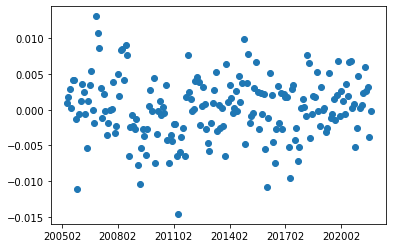

In [54]:
import matplotlib.pyplot as plt
plt.scatter(Mart_del2['date'][13:],Mart_del2['M2_L3'][13:])
plt.xticks(np.arange(0,len(Mart_del2[13:]),36))
plt.show()


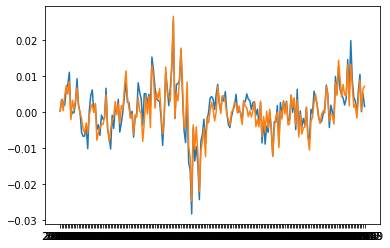

In [21]:
plt.plot(Mart_del2['sales_APT_metro'][13:])
plt.plot(Mart_del2['sales_APT_etc'][13:])


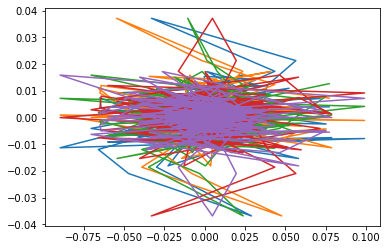

In [86]:
import matplotlib.pyplot as plt

plt.plot(Mart_del2['M1'][13:],Mart_del2['sales_APT_kr'][13:])
plt.plot(Mart_del2['M1_L3'][13:],Mart_del2['sales_APT_kr'][13:])
plt.plot(Mart_del2['M1_L6'][13:],Mart_del2['sales_APT_kr'][13:])
plt.plot(Mart_del2['M1_L12'][13:],Mart_del2['sales_APT_kr'][13:])
plt.plot(Mart_del2['M1_L24'][13:],Mart_del2['sales_APT_kr'][13:])

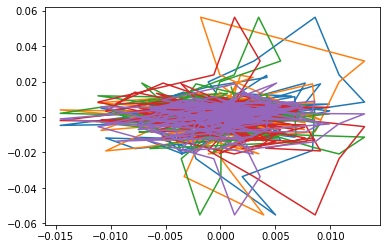

In [87]:
plt.plot(Mart_del2['M2'][13:],Mart_del2['sales_APT_SE'][13:])
plt.plot(Mart_del2['M2_L3'][13:],Mart_del2['sales_APT_SE'][13:])
plt.plot(Mart_del2['M2_L6'][13:],Mart_del2['sales_APT_SE'][13:])
plt.plot(Mart_del2['M2_L12'][13:],Mart_del2['sales_APT_SE'][13:])
plt.plot(Mart_del2['M2_L24'][13:],Mart_del2['sales_APT_SE'][13:])

## 4. 통계검정

* OLS
* VAR

In [105]:
from statsmodels.formula.api import ols

ols('sales_APT_SE ~ M2_L3 + real_GDP_M', data = Mart_del2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sales_APT_SE   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.539
Date:                Sat, 18 Dec 2021   Prob (F-statistic):             0.0816
Time:                        12:25:09   Log-Likelihood:                 619.67
No. Observations:                 197   AIC:                            -1233.
Df Residuals:                     194   BIC:                            -1223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.001      0.402      0.688      -0.001       0.002
M2_L3          0.3183      0.174      1.831      0.069      -0.025       0.661
real_GDP_M     0.1796      0.157      1.143      0.255      -0.130       0.489
==============================================================================
Omnibus:                       42.986   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.413
Skew:                          -0.186   Prob(JB):                    3.35e-122
Kurtosis:                      11.247   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
Mart_del3 = Mart_del2[13:]
date_str = ['2005-02-01','2005-03-01','2005-04-01','2005-05-01','2005-06-01','2005-07-01','2005-08-01','2005-09-01','2005-10-01','2005-11-01','2005-12-01','2006-01-01','2006-02-01','2006-03-01','2006-04-01','2006-05-01','2006-06-01','2006-07-01','2006-08-01','2006-09-01','2006-10-01','2006-11-01','2006-12-01','2007-01-01','2007-02-01','2007-03-01','2007-04-01','2007-05-01','2007-06-01','2007-07-01','2007-08-01','2007-09-01','2007-10-01','2007-11-01','2007-12-01','2008-01-01','2008-02-01','2008-03-01','2008-04-01','2008-05-01','2008-06-01','2008-07-01','2008-08-01','2008-09-01','2008-10-01','2008-11-01','2008-12-01','2009-01-01','2009-02-01','2009-03-01','2009-04-01','2009-05-01','2009-06-01','2009-07-01','2009-08-01','2009-09-01','2009-10-01','2009-11-01','2009-12-01','2010-01-01','2010-02-01','2010-03-01','2010-04-01','2010-05-01','2010-06-01','2010-07-01','2010-08-01','2010-09-01','2010-10-01','2010-11-01','2010-12-01','2011-01-01','2011-02-01','2011-03-01','2011-04-01','2011-05-01','2011-06-01','2011-07-01','2011-08-01','2011-09-01','2011-10-01','2011-11-01','2011-12-01','2012-01-01','2012-02-01','2012-03-01','2012-04-01','2012-05-01','2012-06-01','2012-07-01','2012-08-01','2012-09-01','2012-10-01','2012-11-01','2012-12-01','2013-01-01','2013-02-01','2013-03-01','2013-04-01','2013-05-01','2013-06-01','2013-07-01','2013-08-01','2013-09-01','2013-10-01','2013-11-01','2013-12-01','2014-01-01','2014-02-01','2014-03-01','2014-04-01','2014-05-01','2014-06-01','2014-07-01','2014-08-01','2014-09-01','2014-10-01','2014-11-01','2014-12-01','2015-01-01','2015-02-01','2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01','2015-11-01','2015-12-01','2016-01-01','2016-02-01','2016-03-01','2016-04-01','2016-05-01','2016-06-01','2016-07-01','2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01','2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01','2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01','2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01']
Mart_del3.index = date_str
Mart_del3

,date,real_GDP_M,M1,M2,M3,M1_L3,M2_L3,M3_L3,M1_L6,M2_L6,...,js_DD_US,js_DD_SJ,js_DD_GW,js_DD_CB,js_DD_CN,js_DD_JB,js_DD_JN,js_DD_KB,js_DD_KN,js_DD_JJ
2005-02-01,200502,-0.001332,0.077155,0.000981,-0.001220,NaN,NaN,NaN,NaN,NaN,...,0.006292,NaN,0.004592,-0.026970,-0.005614,0.003354,-0.006688,0.012908,0.009720,-0.006353
2005-03-01,200503,-0.001323,-0.034553,0.001809,-0.004676,NaN,NaN,NaN,NaN,NaN,...,0.007212,NaN,0.026004,0.035264,0.006213,0.009178,0.003551,0.004310,0.005495,0.055165
2005-04-01,200504,0.003729,0.007679,0.002972,0.002781,NaN,NaN,NaN,NaN,NaN,...,-0.008134,NaN,-0.002038,0.001601,-0.009287,-0.000948,-0.001008,0.013002,0.005382,-0.001008
2005-05-01,200505,0.003696,-0.000273,0.000249,0.001497,0.077155,0.000981,-0.001220,NaN,NaN,...,-0.009500,NaN,0.001204,-0.002206,-0.003388,0.001293,-0.013941,0.007411,-0.003586,0.000140
2005-06-01,200506,0.003664,-0.000268,0.004198,0.003997,-0.034553,0.001809,-0.004676,NaN,NaN,...,0.020972,NaN,-0.000164,0.003016,0.007679,0.015035,0.008780,0.016973,0.004468,0.045308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,202105,0.013230,-0.015302,-0.003778,-0.002784,0.030845,0.006056,0.005279,0.004932,0.000237,...,-0.001940,-0.001941,-0.001940,-0.001940,-0.002941,-0.002941,-0.001940,-0.002941,-0.001941,0.000046
2021-06-01,202106,0.013338,0.005809,-0.000149,0.001923,-0.012382,0.002687,0.004320,-0.010331,0.000668,...,0.003179,0.002178,0.002170,0.003179,0.002178,0.002175,0.002170,0.002178,0.002178,0.004169
2021-07-01,202107,-0.006380,-0.005345,0.003948,0.003273,-0.010286,0.003193,0.004236,-0.011008,0.002366,...,0.000854,-0.002162,-0.001142,-0.000144,-0.002142,-0.002142,-0.002150,-0.002142,-0.002142,-0.000146
2021-08-01,202108,-0.006327,-0.004684,0.009945,0.007614,-0.015302,-0.003778,-0.002784,0.030845,0.006056,...,0.001778,-0.001233,0.000784,-0.000222,0.000785,0.000785,-0.000214,0.000785,0.000785,0.001782


In [137]:
#x = pd.merge(
#    left = Mart_del2['M2'][13:]
#    ,right = Mart_del2['sales_APT_kr'][13:]
#    ,left_index=True
#    ,right_index=True
#    ,how = 'inner')

In [166]:
from statsmodels.tsa.stattools import grangercausalitytests
# H0 : M1 does NOT granger cause sales_APT_kr
# Ha : M1 granger cause sales_APT_kr
grangercausalitytests(Mart_del3[['sales_APT_kr','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_kr','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_kr','M3']],maxlag=12)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9126  , p=0.3406  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.9266  , p=0.3357  , df=1
likelihood ratio test: chi2=0.9245  , p=0.3363  , df=1
parameter F test:         F=0.9126  , p=0.3406  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5883  , p=0.2069  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=3.2589  , p=0.1960  , df=2
likelihood ratio test: chi2=3.2324  , p=0.1987  , df=2
parameter F test:         F=1.5883  , p=0.2069  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6986  , p=0.1688  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=5.2835  , p=0.1522  , df=3
likelihood ratio test: chi2=5.2139  , p=0.1568  , df=3
parameter F test:         F=1.6986  , p=0.1688  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0491  , p=0.0892  

{1: ({'ssr_ftest': (1.6115048243144507, 0.20578564096154792, 196.0, 1),
   'ssr_chi2test': (1.6361707144825293, 0.20085167202372864, 1),
   'lrtest': (1.6294810895128649, 0.20177483618298953, 1),
   'params_ftest': (1.6115048243144712, 0.20578564096154847, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.829828312324825, 0.4376741119015227, 193.0, 2),
   'ssr_chi2test': (1.7026529102623353, 0.4268483610676046, 2),
   'lrtest': (1.69537383517104, 0.4284047222034091, 2),
   'params_ftest': (0.8298283123248436, 0.4376741119015134, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4196500791530545, 0.7391080784447528, 190.0, 3),
   'ssr_chi2test': (1.3053326146287114, 0.7278671852584092, 3),
   'lrtest': (1.3010270214399497, 0.7288892142978622, 3),
   'params_ftest': (0.4196500791530539, 0.7391080784447528, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

In [167]:

grangercausalitytests(Mart_del3[['sales_APT_sudo','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_sudo','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_sudo','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2343  , p=0.6289  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.2379  , p=0.6257  , df=1
likelihood ratio test: chi2=0.2378  , p=0.6258  , df=1
parameter F test:         F=0.2343  , p=0.6289  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7694  , p=0.4647  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=1.5786  , p=0.4542  , df=2
likelihood ratio test: chi2=1.5723  , p=0.4556  , df=2
parameter F test:         F=0.7694  , p=0.4647  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4539  , p=0.0646  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=7.6329  , p=0.0542  , df=3
likelihood ratio test: chi2=7.4887  , p=0.0578  , df=3
parameter F test:         F=2.4539  , p=0.0646  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4524  , p=0.0095  

{1: ({'ssr_ftest': (6.037802441935867, 0.014872076356243552, 196.0, 1),
   'ssr_chi2test': (6.130217785434884, 0.0132890500386714, 1),
   'lrtest': (6.03769213127498, 0.014003578941017232, 1),
   'params_ftest': (6.0378024419359075, 0.014872076356243366, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.070950624619981, 0.048650205596565126, 193.0, 2),
   'ssr_chi2test': (6.3010178619145725, 0.042830323641730735, 2),
   'lrtest': (6.202835755194656, 0.0449853734002497, 2),
   'params_ftest': (3.0709506246199654, 0.04865020559656564, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.673395130317466, 0.17415599808654741, 190.0, 3),
   'ssr_chi2test': (5.205139589566432, 0.1573775347766443, 3),
   'lrtest': (5.137562186659352, 0.16199688495218512, 3),
   'params_ftest': (1.6733951303174737, 0.1741559980865439, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [169]:
grangercausalitytests(Mart_del3[['sales_APT_metro','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_metro','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_metro','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3958  , p=0.2389  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=1.4172  , p=0.2339  , df=1
likelihood ratio test: chi2=1.4121  , p=0.2347  , df=1
parameter F test:         F=1.3958  , p=0.2389  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1870  , p=0.3073  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=2.4356  , p=0.2959  , df=2
likelihood ratio test: chi2=2.4207  , p=0.2981  , df=2
parameter F test:         F=1.1870  , p=0.3073  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9194  , p=0.4325  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=2.8598  , p=0.4138  , df=3
likelihood ratio test: chi2=2.8392  , p=0.4171  , df=3
parameter F test:         F=0.9194  , p=0.4325  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2189  , p=0.3042  

{1: ({'ssr_ftest': (0.691554105177, 0.4066482541312245, 196.0, 1),
   'ssr_chi2test': (0.7021391169909337, 0.40206585213199353, 1),
   'lrtest': (0.7009033311760504, 0.4024803282719006, 1),
   'params_ftest': (0.6915541051770061, 0.4066482541312245, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.128446404799196, 0.32566061065578067, 193.0, 2),
   'ssr_chi2test': (2.3153615352356556, 0.31421407193265133, 2),
   'lrtest': (2.3019285313985165, 0.31633159456166754, 2),
   'params_ftest': (1.1284464047991876, 0.32566061065578067, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8727308325738126, 0.45623964250070503, 190.0, 3),
   'ssr_chi2test': (2.7146522213217015, 0.43774304293450417, 3),
   'lrtest': (2.696118390653737, 0.44088733629053023, 3),
   'params_ftest': (0.8727308325738009, 0.45623964250071636, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [170]:
grangercausalitytests(Mart_del3[['sales_APT_etc','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_etc','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_APT_etc','M3']],maxlag=12)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6798  , p=0.1965  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=1.7055  , p=0.1916  , df=1
likelihood ratio test: chi2=1.6982  , p=0.1925  , df=1
parameter F test:         F=1.6798  , p=0.1965  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7867  , p=0.4568  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=1.6142  , p=0.4462  , df=2
likelihood ratio test: chi2=1.6076  , p=0.4476  , df=2
parameter F test:         F=0.7867  , p=0.4568  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8166  , p=0.4862  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=2.5399  , p=0.4681  , df=3
likelihood ratio test: chi2=2.5237  , p=0.4710  , df=3
parameter F test:         F=0.8166  , p=0.4862  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3658  , p=0.2474  

{1: ({'ssr_ftest': (1.2317828447903556, 0.26842040567935144, 196.0, 1),
   'ssr_chi2test': (1.250636663843269, 0.2634309127781938, 1),
   'lrtest': (1.2467231722271208, 0.26417925771481365, 1),
   'params_ftest': (1.2317828447903856, 0.2684204056793421, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0252200244366751, 0.3606626295403961, 193.0, 2),
   'ssr_chi2test': (2.103560257393385, 0.3493153690046033, 2),
   'lrtest': (2.0924646192734144, 0.3512586930875588, 2),
   'params_ftest': (1.0252200244366678, 0.3606626295403955, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6817111222590543, 0.5642403831320375, 190.0, 3),
   'ssr_chi2test': (2.1204803855531638, 0.5477805667333602, 3),
   'lrtest': (2.109149346693812, 0.5500640070274354, 3),
   'params_ftest': (0.6817111222590597, 0.5642403831320331, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [175]:
grangercausalitytests(Mart_del3[['sales_DSD_kr','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_kr','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_kr','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1558  , p=0.6935  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.1581  , p=0.6909  , df=1
likelihood ratio test: chi2=0.1581  , p=0.6909  , df=1
parameter F test:         F=0.1558  , p=0.6935  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1272  , p=0.1220  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=4.3646  , p=0.1128  , df=2
likelihood ratio test: chi2=4.3172  , p=0.1155  , df=2
parameter F test:         F=2.1272  , p=0.1220  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6098  , p=0.0528  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=8.1180  , p=0.0436  , df=3
likelihood ratio test: chi2=7.9552  , p=0.0469  , df=3
parameter F test:         F=2.6098  , p=0.0528  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6620  , p=0.0340  

{1: ({'ssr_ftest': (4.812066134513979, 0.02943728385815277, 196.0, 1),
   'ssr_chi2test': (4.885720208001439, 0.02707973454960554, 1),
   'lrtest': (4.826708601513474, 0.028022078102477473, 1),
   'params_ftest': (4.812066134513981, 0.02943728385815277, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.456996866428874, 0.08836856869469223, 193.0, 2),
   'ssr_chi2test': (5.041299269978415, 0.08040735434810184, 2),
   'lrtest': (4.978189722307434, 0.08298504557999992, 2),
   'params_ftest': (2.4569968664288684, 0.08836856869469309, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4002471398955059, 0.24410148060007075, 190.0, 3),
   'ssr_chi2test': (4.355505577253916, 0.22554668422239077, 3),
   'lrtest': (4.308055396390955, 0.23006370322053438, 3),
   'params_ftest': (1.4002471398955523, 0.24410148060005665, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [176]:
grangercausalitytests(Mart_del3[['sales_DSD_sudo','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_sudo','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_sudo','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1239  , p=0.2904  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=1.1411  , p=0.2854  , df=1
likelihood ratio test: chi2=1.1378  , p=0.2861  , df=1
parameter F test:         F=1.1239  , p=0.2904  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3647  , p=0.0366  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=6.9038  , p=0.0317  , df=2
likelihood ratio test: chi2=6.7862  , p=0.0336  , df=2
parameter F test:         F=3.3647  , p=0.0366  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7471  , p=0.0120  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=11.6554 , p=0.0087  , df=3
likelihood ratio test: chi2=11.3236 , p=0.0101  , df=3
parameter F test:         F=3.7471  , p=0.0120  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5150  , p=0.0086  

{1: ({'ssr_ftest': (6.132661549352867, 0.014117993322051324, 196.0, 1),
   'ssr_chi2test': (6.226528817965411, 0.012585020048364301, 1),
   'lrtest': (6.131103027935751, 0.013282397878392825, 1),
   'params_ftest': (6.13266154935285, 0.014117993322051324, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.0873841244182776, 0.047881570852355025, 193.0, 2),
   'ssr_chi2test': (6.334736338184651, 0.04211428986801553, 2),
   'lrtest': (6.235511595466278, 0.04425637731793734, 2),
   'params_ftest': (3.0873841244182834, 0.047881570852355025, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.8124396387579864, 0.1463081942485366, 190.0, 3),
   'ssr_chi2test': (5.637641192136684, 0.13063404317065186, 3),
   'lrtest': (5.558480390788191, 0.1351823830790768, 3),
   'params_ftest': (1.8124396387579855, 0.1463081942485366, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [177]:
grangercausalitytests(Mart_del3[['sales_DSD_metro','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_metro','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_metro','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0034  , p=0.9533  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.0035  , p=0.9529  , df=1
likelihood ratio test: chi2=0.0035  , p=0.9529  , df=1
parameter F test:         F=0.0034  , p=0.9533  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1227  , p=0.8846  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=0.2518  , p=0.8817  , df=2
likelihood ratio test: chi2=0.2516  , p=0.8818  , df=2
parameter F test:         F=0.1227  , p=0.8846  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5079  , p=0.6773  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=1.5797  , p=0.6640  , df=3
likelihood ratio test: chi2=1.5734  , p=0.6654  , df=3
parameter F test:         F=0.5079  , p=0.6773  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6795  , p=0.6070  

{1: ({'ssr_ftest': (0.10612240180727595, 0.74495018795443, 196.0, 1),
   'ssr_chi2test': (0.10774672428391792, 0.7427241868175889, 1),
   'lrtest': (0.10771756557096523, 0.7427577692404705, 1),
   'params_ftest': (0.10612240180725764, 0.7449501879544553, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.31533165721525835, 0.7299220185386333, 193.0, 2),
   'ssr_chi2test': (0.6470017422655042, 0.7236113275605804, 2),
   'lrtest': (0.6459469403539515, 0.7239930615209259, 2),
   'params_ftest': (0.315331657215262, 0.7299220185386254, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.1071946085368802, 0.34743144414445426, 190.0, 3),
   'ssr_chi2test': (3.44395796655419, 0.32810365257785534, 3),
   'lrtest': (3.41420060720975, 0.33206168585672347, 3),
   'params_ftest': (1.1071946085368676, 0.3474314441444538, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

In [178]:
grangercausalitytests(Mart_del3[['sales_DSD_etc','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_etc','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DSD_etc','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6295  , p=0.4285  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.6391  , p=0.4240  , df=1
likelihood ratio test: chi2=0.6381  , p=0.4244  , df=1
parameter F test:         F=0.6295  , p=0.4285  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5762  , p=0.5630  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=1.1823  , p=0.5537  , df=2
likelihood ratio test: chi2=1.1788  , p=0.5547  , df=2
parameter F test:         F=0.5762  , p=0.5630  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8809  , p=0.4520  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=2.7401  , p=0.4335  , df=3
likelihood ratio test: chi2=2.7212  , p=0.4366  , df=3
parameter F test:         F=0.8809  , p=0.4520  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0412  , p=0.3872  

{1: ({'ssr_ftest': (0.20849480049459554, 0.648455334726802, 196.0, 1),
   'ssr_chi2test': (0.21168604744094138, 0.645449094874546, 1),
   'lrtest': (0.2115735368138303, 0.645536867762394, 1),
   'params_ftest': (0.20849480049460956, 0.648455334726802, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.16400915018700568, 0.8488524208274524, 193.0, 2),
   'ssr_chi2test': (0.33651618380338993, 0.8451356838585515, 2),
   'lrtest': (0.33623053987685125, 0.8452563964161462, 2),
   'params_ftest': (0.16400915018699513, 0.8488524208274524, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.35232541005570966, 0.7875083362199986, 190.0, 3),
   'ssr_chi2test': (1.0959174596996022, 0.7780597154463557, 3),
   'lrtest': (1.0928804055993169, 0.7787930542173619, 3),
   'params_ftest': (0.3523254100557108, 0.7875083362199986, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [179]:
grangercausalitytests(Mart_del3[['sales_DD_kr','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_kr','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_kr','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0145  , p=0.9044  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.0147  , p=0.9036  , df=1
likelihood ratio test: chi2=0.0147  , p=0.9036  , df=1
parameter F test:         F=0.0145  , p=0.9044  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4090  , p=0.6649  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=0.8392  , p=0.6573  , df=2
likelihood ratio test: chi2=0.8374  , p=0.6579  , df=2
parameter F test:         F=0.4090  , p=0.6649  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4035  , p=0.2431  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=4.3657  , p=0.2246  , df=3
likelihood ratio test: chi2=4.3181  , p=0.2291  , df=3
parameter F test:         F=1.4035  , p=0.2431  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3664  , p=0.2472  

{1: ({'ssr_ftest': (1.4145473201919532, 0.235741797284684, 196.0, 1),
   'ssr_chi2test': (1.4361985546846874, 0.23075548886472325, 1),
   'lrtest': (1.4310407772577491, 0.23159465818318434, 1),
   'params_ftest': (1.4145473201919985, 0.2357417972846873, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0895915140699128, 0.33841372834088046, 193.0, 2),
   'ssr_chi2test': (2.2356385470035516, 0.32699209800415424, 2),
   'lrtest': (2.2231113427005766, 0.32904667421952183, 2),
   'params_ftest': (1.089591514069922, 0.3384137283408773, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4993533903725218, 0.6831705261067422, 190.0, 3),
   'ssr_chi2test': (1.5532518616324233, 0.6700354680422619, 3),
   'lrtest': (1.547160530571091, 0.6714292469466692, 3),
   'params_ftest': (0.4993533903725286, 0.6831705261067422, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [180]:
grangercausalitytests(Mart_del3[['sales_DD_sudo','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_sudo','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_sudo','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8930  , p=0.3458  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.9066  , p=0.3410  , df=1
likelihood ratio test: chi2=0.9046  , p=0.3416  , df=1
parameter F test:         F=0.8930  , p=0.3458  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6411  , p=0.1965  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=3.3672  , p=0.1857  , df=2
likelihood ratio test: chi2=3.3389  , p=0.1884  , df=2
parameter F test:         F=1.6411  , p=0.1965  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8403  , p=0.0392  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=8.8347  , p=0.0316  , df=3
likelihood ratio test: chi2=8.6423  , p=0.0344  , df=3
parameter F test:         F=2.8403  , p=0.0392  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1956  , p=0.0144  

{1: ({'ssr_ftest': (6.129827391559688, 0.014139938246952663, 196.0, 1),
   'ssr_chi2test': (6.22365128020601, 0.012605489075490172, 1),
   'lrtest': (6.12831277449277, 0.013303376875335058, 1),
   'params_ftest': (6.129827391559659, 0.014139938246952654, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.0920999273545346, 0.04766327530934286, 193.0, 2),
   'ssr_chi2test': (6.3444122861782155, 0.041911034098255626, 2),
   'lrtest': (6.244887350062072, 0.04404939438577373, 2),
   'params_ftest': (3.092099927354519, 0.04766327530934373, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4889250897164072, 0.21892707417202867, 190.0, 3),
   'ssr_chi2test': (4.631340673802088, 0.20086994900693125, 3),
   'lrtest': (4.5777392484155826, 0.2054600592708678, 3),
   'params_ftest': (1.4889250897164068, 0.21892707417202867, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [181]:
grangercausalitytests(Mart_del3[['sales_DD_metro','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_metro','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_metro','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3666  , p=0.0680  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=3.4181  , p=0.0645  , df=1
likelihood ratio test: chi2=3.3891  , p=0.0656  , df=1
parameter F test:         F=3.3666  , p=0.0680  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7662  , p=0.0654  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=5.6758  , p=0.0585  , df=2
likelihood ratio test: chi2=5.5960  , p=0.0609  , df=2
parameter F test:         F=2.7662  , p=0.0654  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9230  , p=0.1273  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=5.9817  , p=0.1125  , df=3
likelihood ratio test: chi2=5.8926  , p=0.1170  , df=3
parameter F test:         F=1.9230  , p=0.1273  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1165  , p=0.0804  

{1: ({'ssr_ftest': (0.11275324522138393, 0.7373902859704309, 196.0, 1),
   'ssr_chi2test': (0.11447906019926225, 0.7351012995606283, 1),
   'lrtest': (0.11444614454285329, 0.7351379539122104, 1),
   'params_ftest': (0.11275324522136561, 0.7373902859704309, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.39433670999219284, 0.6746689240697852, 193.0, 2),
   'ssr_chi2test': (0.8091053738699915, 0.667275225037331, 2),
   'lrtest': (0.8074567033827407, 0.6678255103011346, 2),
   'params_ftest': (0.3943367099922101, 0.6746689240697634, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.7417286596622882, 0.5283998732853172, 190.0, 3),
   'ssr_chi2test': (2.3071665150548015, 0.5111493833984542, 3),
   'lrtest': (2.2937608840179564, 0.5137172096093805, 3),
   'params_ftest': (0.7417286596622761, 0.5283998732853297, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [182]:
grangercausalitytests(Mart_del3[['sales_DD_etc','M1']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_etc','M2']],maxlag=12)
grangercausalitytests(Mart_del3[['sales_DD_etc','M3']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0006  , p=0.9803  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.0006  , p=0.9801  , df=1
likelihood ratio test: chi2=0.0006  , p=0.9801  , df=1
parameter F test:         F=0.0006  , p=0.9803  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2882  , p=0.7499  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=0.5913  , p=0.7440  , df=2
likelihood ratio test: chi2=0.5905  , p=0.7444  , df=2
parameter F test:         F=0.2882  , p=0.7499  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6350  , p=0.5933  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=1.9753  , p=0.5775  , df=3
likelihood ratio test: chi2=1.9655  , p=0.5796  , df=3
parameter F test:         F=0.6350  , p=0.5933  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6687  , p=0.6144  

{1: ({'ssr_ftest': (0.2694494202143331, 0.604286967190526, 196.0, 1),
   'ssr_chi2test': (0.27357364603394024, 0.6009445521410125, 1),
   'lrtest': (0.2733857716179955, 0.6010695578358332, 1),
   'params_ftest': (0.2694494202143747, 0.6042869671904968, 196.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0603097755066822, 0.34835718495383156, 193.0, 2),
   'ssr_chi2test': (2.175557881350498, 0.3369640803950815, 2),
   'lrtest': (2.1636925652301215, 0.33896911477347974, 2),
   'params_ftest': (1.060309775506678, 0.34835718495383156, 193.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6728679571715392, 0.5696665456348169, 190.0, 3),
   'ssr_chi2test': (2.0929734878335773, 0.5533355820778119, 3),
   'lrtest': (2.081933496468082, 0.5555763781462468, 3),
   'params_ftest': (0.6728679571715341, 0.5696665456348169, 190.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 